In [1]:
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
from Bio import SeqIO
import re

#### Read GCA

In [2]:
GCA = pd.read_table("all_GCA_after_blast_GCA.tsv")

In [3]:
GCA

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,id_scores,consensus_support,reference_file_name,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source
0,SVLRPSQFGGQPCTEPLVAFQPCIPSK,GCA_179356,[105],[131],0.000556,1,['13|23-UNIMOD:4'],4390.1000,3,1000.843649,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,24970,NaN,NaN,NaN,NaN,NaN,GCA
1,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,33949,NaN,NaN,NaN,NaN,NaN,GCA
2,QSGGSSQAGAVTVSDVQELMR,"GCA_5200,GCA_5203,GCA_102666,GCA_102667",[8 8 8 8],[28 28 28 28],0.000556,0,NaN,4081.7000,2,1054.513854,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,21737,NaN,NaN,NaN,NaN,NaN,GCA
3,LGMIVDKIDVDKDGFVTEGELK,"GCA_118448,GCA_118449",[81 73],[102 94],0.000556,0,NaN,4128.1000,4,606.070749,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6929847...",NaN,01524_A01_P015424_S00_N01_R1,22238,NaN,NaN,NaN,NaN,NaN,GCA
4,SLPEETVDFMVQHTSFK,GCA_94965,[214],[230],0.000556,1,NaN,4693.2000,2,997.985107,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6599993...",NaN,01524_A01_P015424_S00_N01_R1,28212,NaN,NaN,NaN,NaN,NaN,GCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '21-UNIMOD:7'],5189.1940,4,958.696960,...,"[""'OpenMS:Target-decoy PSM q-value': 2.6929847...",NaN,01307_D05_P013386_S00_N36_R1,39778,NaN,NaN,NaN,NaN,NaN,GCA
128905,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4'],5638.0405,4,958.194336,...,"[""'OpenMS:Target-decoy PSM q-value': 6.3000874...",NaN,01307_D05_P013386_S00_N36_R1,43522,NaN,NaN,NaN,NaN,NaN,GCA
128906,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '19|21-UNIMOD:7' '27-UNIMOD:35'],5625.7710,4,962.948120,...,"[""'OpenMS:Target-decoy PSM q-value': 2.1532954...",NaN,01307_D05_P013386_S00_N36_R1,43420,NaN,NaN,NaN,NaN,NaN,GCA
128907,LLNLLADLVER,GCA_168207,[104],[114],0.000556,1,NaN,5904.1143,2,634.882690,...,"[""'OpenMS:Target-decoy PSM q-value': 5.7928041...",NaN,01307_D05_P013386_S00_N36_R1,45703,NaN,NaN,NaN,NaN,NaN,GCA


#### PeptideAtlas

In [4]:
column_names = ['PeptideAccession', 'observations', 'best score', 'peptide sequence','']
PeptideAtlas = pd.read_table("PeptideAtlasInput_concat.PAidentlist.peptideSummary",header=None,names=column_names)

In [5]:
PeptideAtlas_dict = dict(zip(PeptideAtlas['peptide sequence'], PeptideAtlas['observations']))

In [6]:
PeptideAtlas_dict

{'PMKDETFGEYR': 14,
 'GLGTDEDTLIEILAS': 188,
 'MLFCSCQDQACAER': 260,
 'ALQQRLQGAEE': 3,
 'ALDWLALIYWDDDKR': 20,
 'SAGRQMIDNSYQVEKLAKDLDF': 1,
 'QASASYDSEEEEEGLPMS': 19,
 'SDVEDHSVHLLFSAN': 10,
 'NDDDKDDEIVFKQPISC': 3,
 'TLNHKLQDASAEVERLRRE': 1,
 'FSCGNGECIPR': 2,
 'QAELLLPGAEFHHYVGGPTETHVVR': 1384,
 'ATSAPAPGAPGGPQLA': 1,
 'TLRILFRPVASQLPRIFTSIGEDYDER': 1,
 'HLMHLELDISDSKIR': 43,
 'NELLGAGIEK': 45,
 'EETKFAQVVLQDLDKK': 3,
 'NAASSEEAKAEETGGGK': 132,
 'THVGMSIQTF': 7,
 'IYDPVCGTDGNTYPNECVLCFEN': 505,
 'SHMLTPFVEENLVSAAGGSISHQVSFSYFNAFNSLLNNMELVR': 43,
 'SDLNEVK': 20,
 'MKPAVDEMFPEGAGPYVDLDEAGGSTGL': 6,
 'VATQLPESTSLR': 75,
 'LTYLPYSMLNLK': 38,
 'DNISFPKQGS': 38,
 'ERTALFEEISRSGELAQEY': 2,
 'VDAVHLLKDHVGR': 124,
 'VKEVLFQHSGFQQS': 4,
 'AQLSDGNVGSGATG': 1,
 'SEAESLKGKLEEER': 3,
 'SVEEVASEIQPFLRG': 1,
 'DGCYCDSLENLADGYK': 24,
 'GYLSEGLVTK': 86,
 'RFEKPLEEKGEGGEFSV': 4,
 'SATSVSSAGEQAAGDPEGR': 3,
 'PQELVTAEVAAPSTSSSATSSPEGPSPARPPR': 8,
 'FPDLGQEVAL': 6,
 'DIAEFLIGQGAHVGAVNSEGDTPL': 16,
 'PFA

In [7]:
def getPeptideAtlasObservations(seq):
    if PeptideAtlas_dict.get(seq):
        return PeptideAtlas_dict.get(seq)
    else:
        return 0

In [8]:
GCA['PeptideAtlas_observations'] = GCA['sequence'].apply(getPeptideAtlasObservations)

In [9]:
GCA

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,consensus_support,reference_file_name,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source,PeptideAtlas_observations
0,SVLRPSQFGGQPCTEPLVAFQPCIPSK,GCA_179356,[105],[131],0.000556,1,['13|23-UNIMOD:4'],4390.1000,3,1000.843649,...,NaN,01524_A01_P015424_S00_N01_R1,24970,NaN,NaN,NaN,NaN,NaN,GCA,4177
1,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,NaN,01524_A01_P015424_S00_N01_R1,33949,NaN,NaN,NaN,NaN,NaN,GCA,0
2,QSGGSSQAGAVTVSDVQELMR,"GCA_5200,GCA_5203,GCA_102666,GCA_102667",[8 8 8 8],[28 28 28 28],0.000556,0,NaN,4081.7000,2,1054.513854,...,NaN,01524_A01_P015424_S00_N01_R1,21737,NaN,NaN,NaN,NaN,NaN,GCA,121
3,LGMIVDKIDVDKDGFVTEGELK,"GCA_118448,GCA_118449",[81 73],[102 94],0.000556,0,NaN,4128.1000,4,606.070749,...,NaN,01524_A01_P015424_S00_N01_R1,22238,NaN,NaN,NaN,NaN,NaN,GCA,0
4,SLPEETVDFMVQHTSFK,GCA_94965,[214],[230],0.000556,1,NaN,4693.2000,2,997.985107,...,NaN,01524_A01_P015424_S00_N01_R1,28212,NaN,NaN,NaN,NaN,NaN,GCA,6073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '21-UNIMOD:7'],5189.1940,4,958.696960,...,NaN,01307_D05_P013386_S00_N36_R1,39778,NaN,NaN,NaN,NaN,NaN,GCA,102375
128905,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4'],5638.0405,4,958.194336,...,NaN,01307_D05_P013386_S00_N36_R1,43522,NaN,NaN,NaN,NaN,NaN,GCA,102375
128906,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '19|21-UNIMOD:7' '27-UNIMOD:35'],5625.7710,4,962.948120,...,NaN,01307_D05_P013386_S00_N36_R1,43420,NaN,NaN,NaN,NaN,NaN,GCA,102375
128907,LLNLLADLVER,GCA_168207,[104],[114],0.000556,1,NaN,5904.1143,2,634.882690,...,NaN,01307_D05_P013386_S00_N36_R1,45703,NaN,NaN,NaN,NaN,NaN,GCA,4674


In [10]:
GCA[GCA['PeptideAtlas_observations']>100].to_csv('GCA_PeptideAtlas_observations_over100.tsv',sep='\t', index=False)

#### GPMDB

In [11]:
len(set(GCA['sequence']))

7141

In [12]:
session = requests.Session()
def getApiRes(seq):
    url = 'https://rest.thegpm.org/1/peptide/count/seq='+seq
    response = session.get(url)
    if response.status_code == 200:
        if len(response.json()) == 1:
            return response.json()[0]
        else:
            return response.json()
    else:
        return "error"

In [14]:
getApiRes("SKVPGVVSGAMSGAVLQNVPTSTVWVAGPK")

0

In [15]:
gpmdb_dict = {}
for i in tqdm(set(GCA['sequence'])):
    gpmdb_dict[i] = getApiRes(i)

100%|██████████| 7141/7141 [1:04:48<00:00,  1.84it/s]


In [16]:
len(gpmdb_dict)

7141

In [19]:
GCA['GPMDB_observations'] = GCA['sequence'].apply(gpmdb_dict.get)

In [20]:
GCA

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,reference_file_name,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source,PeptideAtlas_observations,GPMDB_observations
0,SVLRPSQFGGQPCTEPLVAFQPCIPSK,GCA_179356,[105],[131],0.000556,1,['13|23-UNIMOD:4'],4390.1000,3,1000.843649,...,01524_A01_P015424_S00_N01_R1,24970,NaN,NaN,NaN,NaN,NaN,GCA,4177,0
1,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,01524_A01_P015424_S00_N01_R1,33949,NaN,NaN,NaN,NaN,NaN,GCA,0,0
2,QSGGSSQAGAVTVSDVQELMR,"GCA_5200,GCA_5203,GCA_102666,GCA_102667",[8 8 8 8],[28 28 28 28],0.000556,0,NaN,4081.7000,2,1054.513854,...,01524_A01_P015424_S00_N01_R1,21737,NaN,NaN,NaN,NaN,NaN,GCA,121,11
3,LGMIVDKIDVDKDGFVTEGELK,"GCA_118448,GCA_118449",[81 73],[102 94],0.000556,0,NaN,4128.1000,4,606.070749,...,01524_A01_P015424_S00_N01_R1,22238,NaN,NaN,NaN,NaN,NaN,GCA,0,2
4,SLPEETVDFMVQHTSFK,GCA_94965,[214],[230],0.000556,1,NaN,4693.2000,2,997.985107,...,01524_A01_P015424_S00_N01_R1,28212,NaN,NaN,NaN,NaN,NaN,GCA,6073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '21-UNIMOD:7'],5189.1940,4,958.696960,...,01307_D05_P013386_S00_N36_R1,39778,NaN,NaN,NaN,NaN,NaN,GCA,102375,71
128905,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4'],5638.0405,4,958.194336,...,01307_D05_P013386_S00_N36_R1,43522,NaN,NaN,NaN,NaN,NaN,GCA,102375,71
128906,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '19|21-UNIMOD:7' '27-UNIMOD:35'],5625.7710,4,962.948120,...,01307_D05_P013386_S00_N36_R1,43420,NaN,NaN,NaN,NaN,NaN,GCA,102375,71
128907,LLNLLADLVER,GCA_168207,[104],[114],0.000556,1,NaN,5904.1143,2,634.882690,...,01307_D05_P013386_S00_N36_R1,45703,NaN,NaN,NaN,NaN,NaN,GCA,4674,60


In [21]:
GCA.to_csv('GCA_observations.tsv',sep='\t', index=False)

In [55]:
GCA[(GCA['PeptideAtlas_observations']<10) & (GCA['GPMDB_observations']<10)]

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source,isGCA,PeptideAtlas_observations,GPMDB_observations
0,DIGTAPFAPNLEEINNILESK,"GCA_166623,GCA_181492",[937 937],[957 957],0.000556,0,NaN,6080.6000,2,1143.094299,...,41482,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
1,IFLVSVEEPLLVKLVSELTPLTVHK,GCA_248243,[1349],[1373],0.000556,1,NaN,5854.5000,3,935.561462,...,39707,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
2,TVMPATLNKLLNNK,GCA_283984,[225],[238],0.063686,1,['3-UNIMOD:35' '8-UNIMOD:7'],4333.1000,3,525.282653,...,24371,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
3,SKVPGVVSGAMSGAVLQNVPTSTVWVAGPK,"GCA_122173,GCA_242828",[272 272],[301 301],0.000556,0,['11-UNIMOD:35' '17|18-UNIMOD:7'],4128.7000,3,981.527770,...,22245,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
4,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,33949,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104470,TPEVTCVVVDVSHQDPEVQFK,GCA_263327,[186],[206],0.000556,1,['6-UNIMOD:4' '14-UNIMOD:7'],4145.0625,3,805.726135,...,30903,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
104471,VAPDEHPILLTKAPLNPK,GCA_190681,[97],[114],0.000556,1,NaN,3281.1985,3,651.714417,...,23713,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
104472,VVSVLTILHQDWLNGK,GCA_268986,[182],[197],0.000556,1,['10-UNIMOD:7'],4149.8230,3,608.332336,...,30938,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0
104475,DVASLSSQIQDTQELLQEETR,GCA_293797,[1316],[1336],0.000556,1,NaN,5055.1770,2,1195.597900,...,38639,NaN,NaN,NaN,NaN,NaN,GCA,GCA,0,0


In [22]:
GCA[(GCA['PeptideAtlas_observations']<10) & (GCA['GPMDB_observations']<10)].to_csv('GCA_observations_less10.tsv',sep='\t', index=False)

#### Uniprot Extended proteomes

In [2]:
GCA = pd.read_table("GCA_observations.tsv")

In [3]:
GCA

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,reference_file_name,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source,PeptideAtlas_observations,GPMDB_observations
0,SVLRPSQFGGQPCTEPLVAFQPCIPSK,GCA_179356,[105],[131],0.000556,1,['13|23-UNIMOD:4'],4390.1000,3,1000.843649,...,01524_A01_P015424_S00_N01_R1,24970,NaN,NaN,NaN,NaN,NaN,GCA,4177,0
1,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,01524_A01_P015424_S00_N01_R1,33949,NaN,NaN,NaN,NaN,NaN,GCA,0,0
2,QSGGSSQAGAVTVSDVQELMR,"GCA_5200,GCA_5203,GCA_102666,GCA_102667",[8 8 8 8],[28 28 28 28],0.000556,0,NaN,4081.7000,2,1054.513854,...,01524_A01_P015424_S00_N01_R1,21737,NaN,NaN,NaN,NaN,NaN,GCA,121,11
3,LGMIVDKIDVDKDGFVTEGELK,"GCA_118448,GCA_118449",[81 73],[102 94],0.000556,0,NaN,4128.1000,4,606.070749,...,01524_A01_P015424_S00_N01_R1,22238,NaN,NaN,NaN,NaN,NaN,GCA,0,2
4,SLPEETVDFMVQHTSFK,GCA_94965,[214],[230],0.000556,1,NaN,4693.2000,2,997.985107,...,01524_A01_P015424_S00_N01_R1,28212,NaN,NaN,NaN,NaN,NaN,GCA,6073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '21-UNIMOD:7'],5189.1940,4,958.696960,...,01307_D05_P013386_S00_N36_R1,39778,NaN,NaN,NaN,NaN,NaN,GCA,102375,71
128905,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4'],5638.0405,4,958.194336,...,01307_D05_P013386_S00_N36_R1,43522,NaN,NaN,NaN,NaN,NaN,GCA,102375,71
128906,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '19|21-UNIMOD:7' '27-UNIMOD:35'],5625.7710,4,962.948120,...,01307_D05_P013386_S00_N36_R1,43420,NaN,NaN,NaN,NaN,NaN,GCA,102375,71
128907,LLNLLADLVER,GCA_168207,[104],[114],0.000556,1,NaN,5904.1143,2,634.882690,...,01307_D05_P013386_S00_N36_R1,45703,NaN,NaN,NaN,NaN,NaN,GCA,4674,60


In [4]:
Uniprot_Extended_proteomes = "Uniprot_extended.fa"

In [5]:
seq_PE_dict = dict()
for j in tqdm(SeqIO.parse(Uniprot_Extended_proteomes, "fasta")):
    match = re.search(r'PE=(\d+)', j.description)
    if match:
        seq_PE_dict[str(j.seq)] = match[0]

226259it [00:02, 80529.09it/s]


In [6]:
seq_PE_dict

{'MEGSKTSNNSTMQVSFVCQRCSQPLKLDTSFKILDRVTIQELTAPLLTTAQAKPGETQEEETNSGEEPFIETPRQDGVSRRFIPPARMMSTESANSFTLIGEASDGGTMENLSRRLKVTGDLFDIMSGQTDVDHPLCEECTDTLLDQLDTQLNVTENECQNYKRCLEILEQMNEDDSEQLQMELKELALEEERLIQELEDVEKNRKIVAENLEKVQAEAERLDQEEAQYQREYSEFKRQQLELDDELKSVENQMRYAQTQLDKLKKTNVFNATFHIWHSGQFGTINNFRLGRLPSVPVEWNEINAAWGQTVLLLHALANKMGLKFQRYRLVPYGNHSYLESLTDKSKELPLYCSGGLRFFWDNKFDHAMVAFLDCVQQFKEEVEKGETRFCLPYRMDVEKGKIEDTGGSGGSYSIKTQFNSEEQWTKALKFMLTNLKWGLAWVSSQFYNK': 'PE=1',
 'MDNMSITNTPTSNDACLSIVHSLMCHRQGGESETFAKRAIESLVKKLKEKKDELDSLITAITTNGAHPSKCVTIQRTLDGRLQVAGRKGFPHVIYARLWRWPDLHKNELKHVKYCQYAFDLKCDSVCVNPYHYERVVSPGIDLSGLTLQSNAPSSMMVKDEYVHDFEGQPSLSTEGHSIQTIQHPPSNRASTETYSTPALLAPSESNATSTANFPNIPVASTSQPASILGGSHSEGLLQIASGPQPGQQQNGFTGQPATYHHNSTTTWTGSRTAPYTPNLPHHQNGHLQHHPPMPPHPGHYWPVHNELAFQPPISNHPAPEYWCSIAYFEMDVQVGETFKVPSSCPIVTVDGYVDPSGGDRFCLGQLSNVHRTEAIERARLHIGKGVQLECKGEGDVWVRCLSDHAVFVQSYYLDREAGRAPGDAVHKIYPSAYIKVFDLRQCHRQMQQQAATAQAAAAAQAAAVAGNIPGPGSVGGIAPAISLSAAAGIGVDDLRRLCILRMSFVKGWGPDYPRQSIKETPCWIEIHLHRALQL

In [7]:
import ahocorasick
pep_set = set(GCA['sequence'].to_list())
pep_PE_dict = dict()

auto = ahocorasick.Automaton()
for pep in pep_set:
    auto.add_word(pep, pep)
    pep_PE_dict[pep] = set()

auto.make_automaton()
for seq in tqdm(seq_PE_dict.keys()):
    for end_ind, found in auto.iter(seq):
        if pep_PE_dict:
            pep_PE_dict[found].add(seq_PE_dict[seq])
        else:
            pep_PE_dict[found] = {seq_PE_dict[seq]}

100%|██████████| 180509/180509 [00:02<00:00, 74032.89it/s] 


In [8]:
pep_PE_dict

{'PLPLPQGLR': set(),
 'VFINQLYQPSLER': set(),
 'KNTVPRPASPTEAGLTTELFSPVDLNQVIVNGNQSLSSQK': {'PE=2'},
 'HHEGFTNWLSPVSWNWNSK': set(),
 'AFFQSHPAPSAER': set(),
 'EAAGEGPALYEDPPDHK': set(),
 'QLTLQHHMGSADLNATFYGPIK': {'PE=2'},
 'TGWEEIGEVDENYAPIHTYQVCK': set(),
 'AFDQGADAIYDHVNEGK': set(),
 'TSAFPIVESVVHEGDLHDPSRDGNLGLAVGEVGMDSK': set(),
 'GFPCSLEHAFSSSPDPV': set(),
 'LPNTLKPDSYQVTLRPYLTPNDR': set(),
 'SGEEDPQPQCQHLCHNYVGGYFCSCRPGYELQK': set(),
 'EEAEESGPQLAPLGVPAPEPKPEPEPPAR': set(),
 'AKPEGALHNNDGLYDPDCDESGLFK': set(),
 'GTAAAAAAAAAAAAKVPAK': set(),
 'LANSEGTSDAWVDQFTRPVNTSALDTEFER': set(),
 'VPEPDYTKVPEPGSIKVPDQGFIK': set(),
 'IREESVMLR': set(),
 'SVLSIQQQHTNPGAFGK': {'PE=2'},
 'DILTIDISR': set(),
 'HELTDEELKSLFTNFANVVDK': set(),
 'QVWVTPFTSGDKIGCFALSEPGNGSDAGAASTTAR': set(),
 'EVCLPAFDAIDMAWPYFLDCHR': set(),
 'AACLPPGDHNALYVNSFPLLDPSDAPFPSLDSLGK': set(),
 'AKVEAMTLNLALLR': set(),
 'VLFICTANITDTIPEPLRDR': set(),
 'GAPPSPEAGFATADHSGQERETEK': set(),
 'DPSWIIR': {'PE=2'},
 'LRSPLPWQYR': {'

In [19]:
def get_PE(pep):
    PEs = pep_PE_dict.get(pep)
    if PEs:
        pe = ','.join(map(str,PEs))
    else:
        pe = ""
    return pe

In [22]:
get_PE("MQHSLAGQTYAVPLIQPDLRREEAVQQMADALQYLQK")

'PE=2,PE=1'

In [23]:
GCA['Uniprot_Extended_PE'] = GCA['sequence'].apply(get_PE)

In [24]:
GCA['Uniprot_Extended_PE'].value_counts()

                       73329
PE=2                   49760
PE=2,PE=1               1373
PE=2,PE=3               1186
PE=2,PE=4                846
PE=4                     608
PE=1                     602
PE=3                     520
PE=1,PE=2,PE=4           206
PE=2,PE=3,PE=1           145
PE=2,PE=4,PE=3,PE=1      128
PE=2,PE=3,PE=4           101
PE=2,PE=4,PE=1            48
PE=3,PE=4                 41
PE=2,PE=5                  8
PE=4,PE=1                  4
PE=1,PE=2,PE=3,PE=4        3
PE=1,PE=2,PE=5,PE=3        1
Name: Uniprot_Extended_PE, dtype: int64

In [25]:
GCA.to_csv('GCA_Uniprot_Extended_PE.tsv',sep='\t', index=False)

#### plot

In [70]:
GCA = pd.read_table('GCA_observations.tsv',sep='\t')

In [71]:
GCA

,sequence,protein_accessions,protein_start_positions,protein_end_positions,protein_global_qvalue,unique,modifications,retention_time,charge,exp_mass_to_charge,...,reference_file_name,scan_number,mz_array,intensity_array,num_peaks,gene_accessions,gene_names,prot_source,PeptideAtlas_observations,GPMDB_observations
0,SVLRPSQFGGQPCTEPLVAFQPCIPSK,GCA_179356,[105],[131],0.000556,1,['13|23-UNIMOD:4'],4390.1000,3,1000.843649,...,01524_A01_P015424_S00_N01_R1,24970,NaN,NaN,NaN,NaN,NaN,GCA,4177,0
1,NHSVAESLNYVASWNMSMLQTQDLVK,GCA_64056,[284],[309],0.000556,1,['1|15-UNIMOD:7' '16-UNIMOD:35'],5243.2000,3,995.142455,...,01524_A01_P015424_S00_N01_R1,33949,NaN,NaN,NaN,NaN,NaN,GCA,0,0
2,QSGGSSQAGAVTVSDVQELMR,"GCA_5200,GCA_5203,GCA_102666,GCA_102667",[8 8 8 8],[28 28 28 28],0.000556,0,NaN,4081.7000,2,1054.513854,...,01524_A01_P015424_S00_N01_R1,21737,NaN,NaN,NaN,NaN,NaN,GCA,121,11
3,LGMIVDKIDVDKDGFVTEGELK,"GCA_118448,GCA_118449",[81 73],[102 94],0.000556,0,NaN,4128.1000,4,606.070749,...,01524_A01_P015424_S00_N01_R1,22238,NaN,NaN,NaN,NaN,NaN,GCA,0,2
4,SLPEETVDFMVQHTSFK,GCA_94965,[214],[230],0.000556,1,NaN,4693.2000,2,997.985107,...,01524_A01_P015424_S00_N01_R1,28212,NaN,NaN,NaN,NaN,NaN,GCA,6073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '21-UNIMOD:7'],5189.1940,4,958.696960,...,01307_D05_P013386_S00_N36_R1,39778,NaN,NaN,NaN,NaN,NaN,GCA,102375,71
128905,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4'],5638.0405,4,958.194336,...,01307_D05_P013386_S00_N36_R1,43522,NaN,NaN,NaN,NaN,NaN,GCA,102375,71
128906,TPEVTCVVVDVSHEDPEVQFNWYVDGMEVHNAK,GCA_22306,[135],[167],0.000556,1,['6-UNIMOD:4' '19|21-UNIMOD:7' '27-UNIMOD:35'],5625.7710,4,962.948120,...,01307_D05_P013386_S00_N36_R1,43420,NaN,NaN,NaN,NaN,NaN,GCA,102375,71
128907,LLNLLADLVER,GCA_168207,[104],[114],0.000556,1,NaN,5904.1143,2,634.882690,...,01307_D05_P013386_S00_N36_R1,45703,NaN,NaN,NaN,NaN,NaN,GCA,4674,60


In [72]:
GCA['PeptideAtlas_observations'].max()

102375

In [73]:
GCA['GPMDB_observations'].max()

498277

#### PeptideAtlas_observations

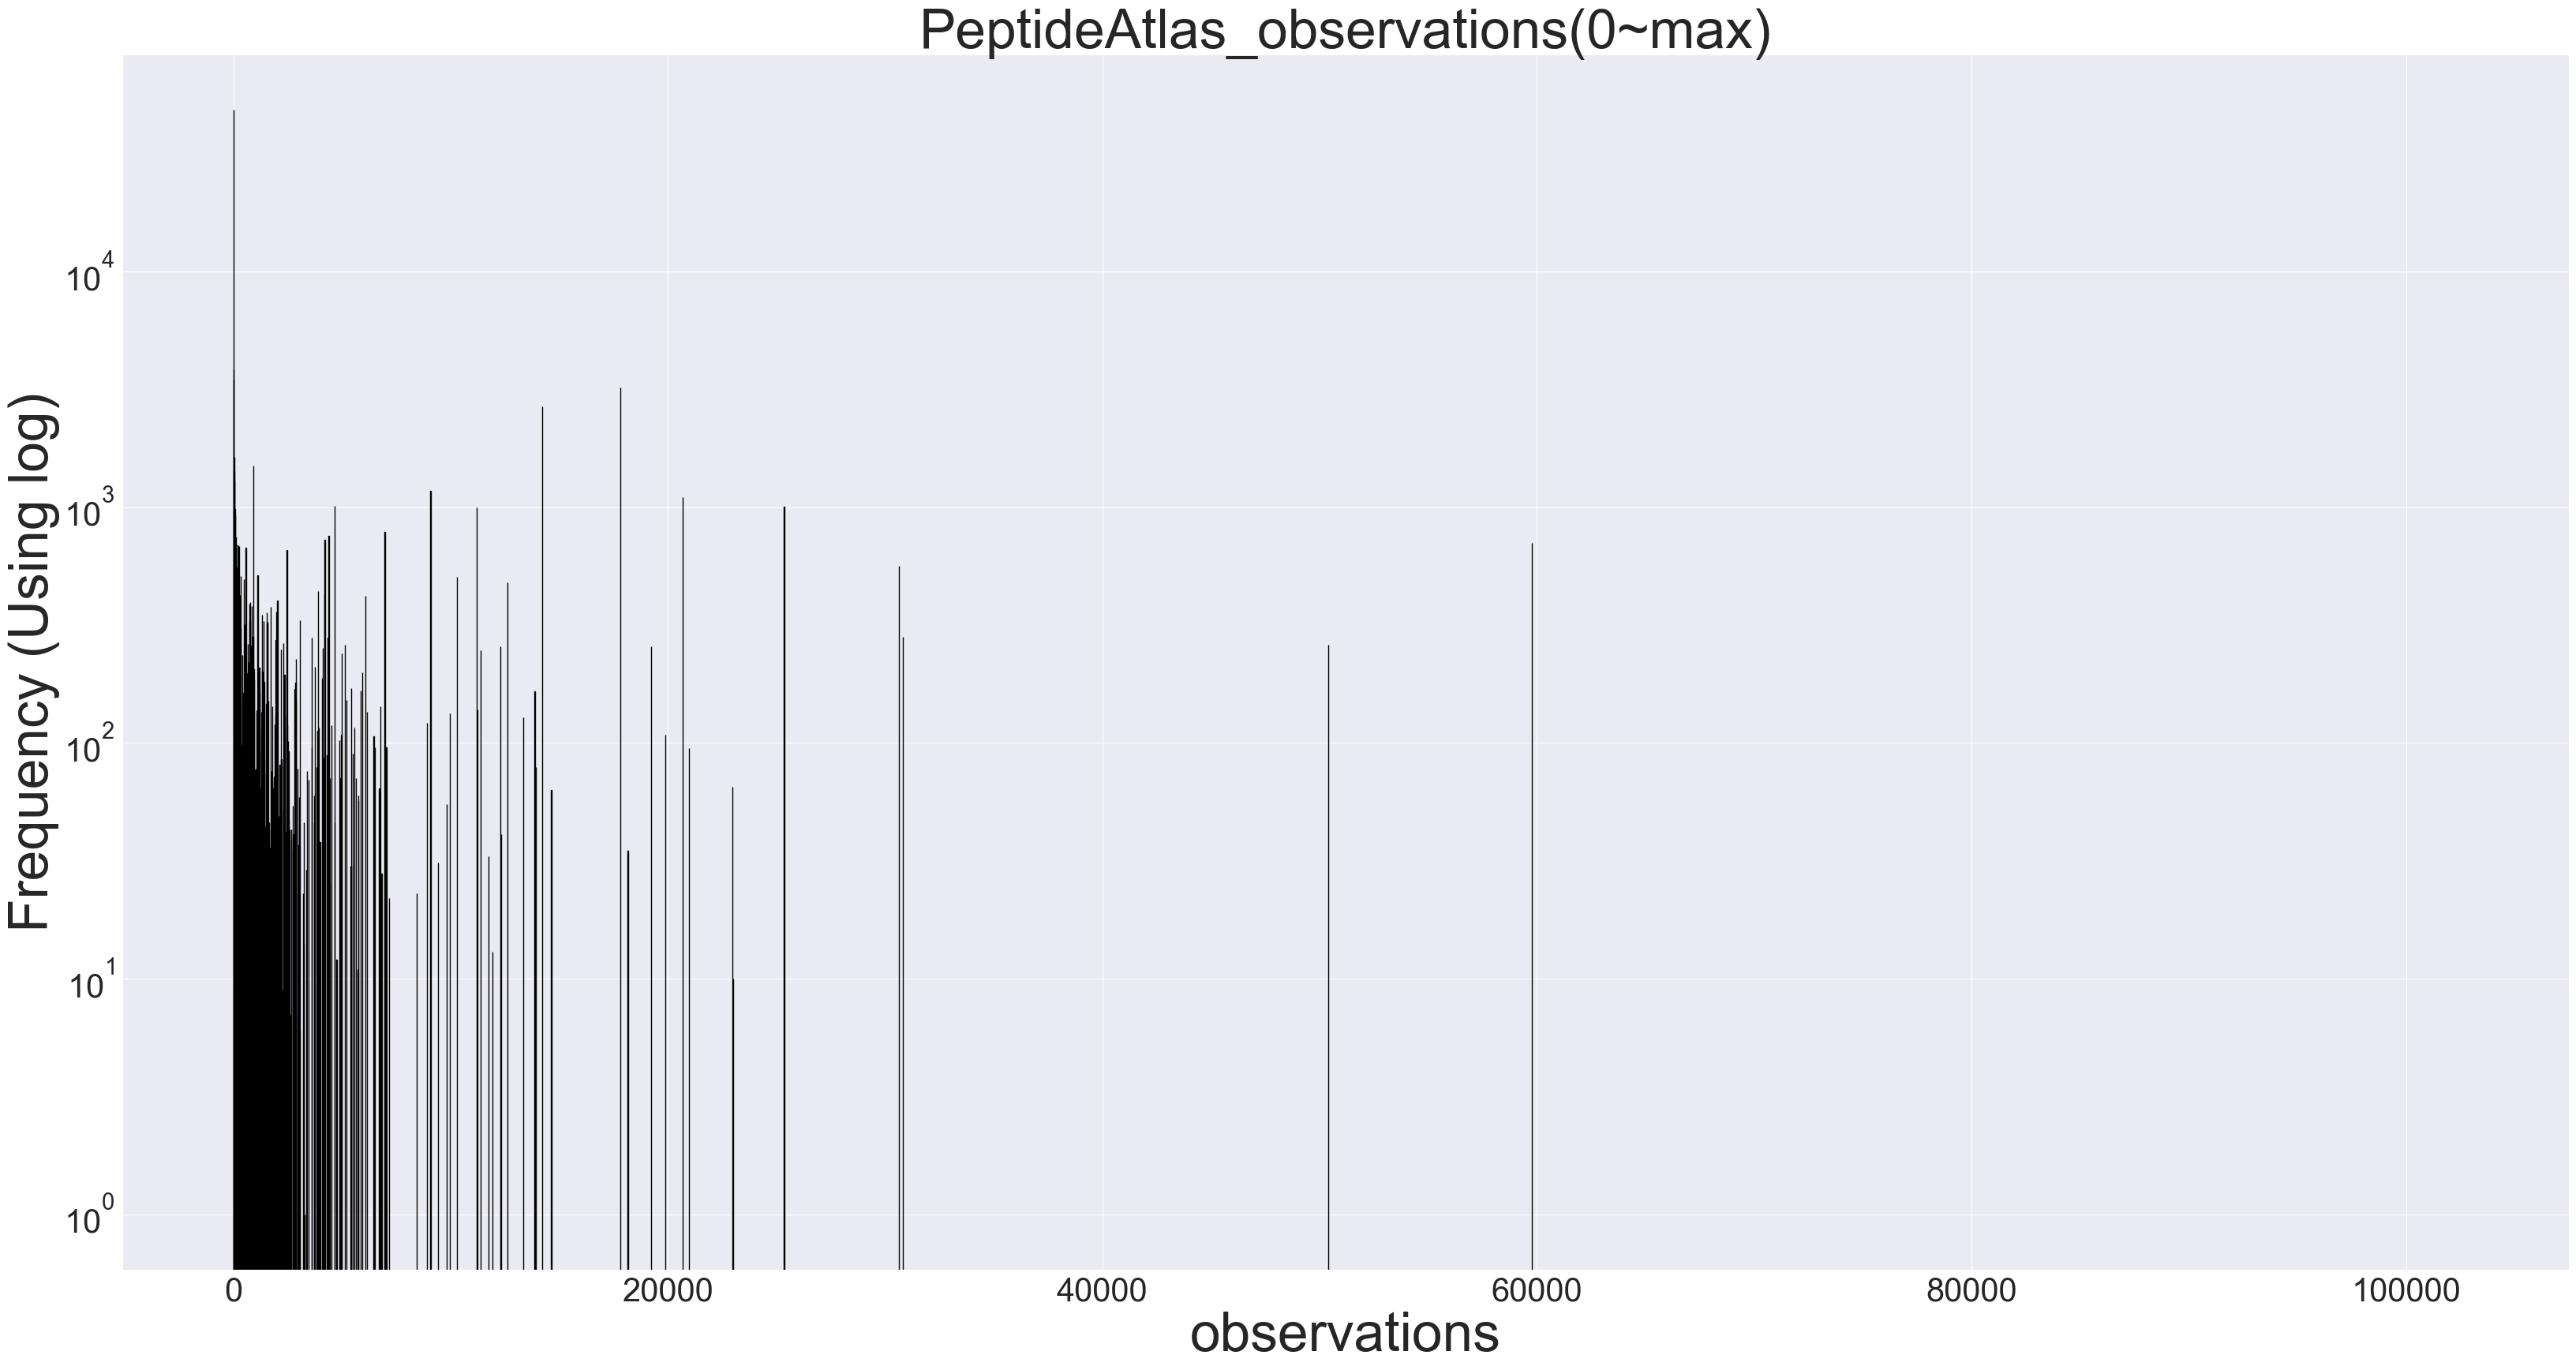

In [75]:
bins = range(0, 102375, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(0~max)', fontsize=50)
plt.show()

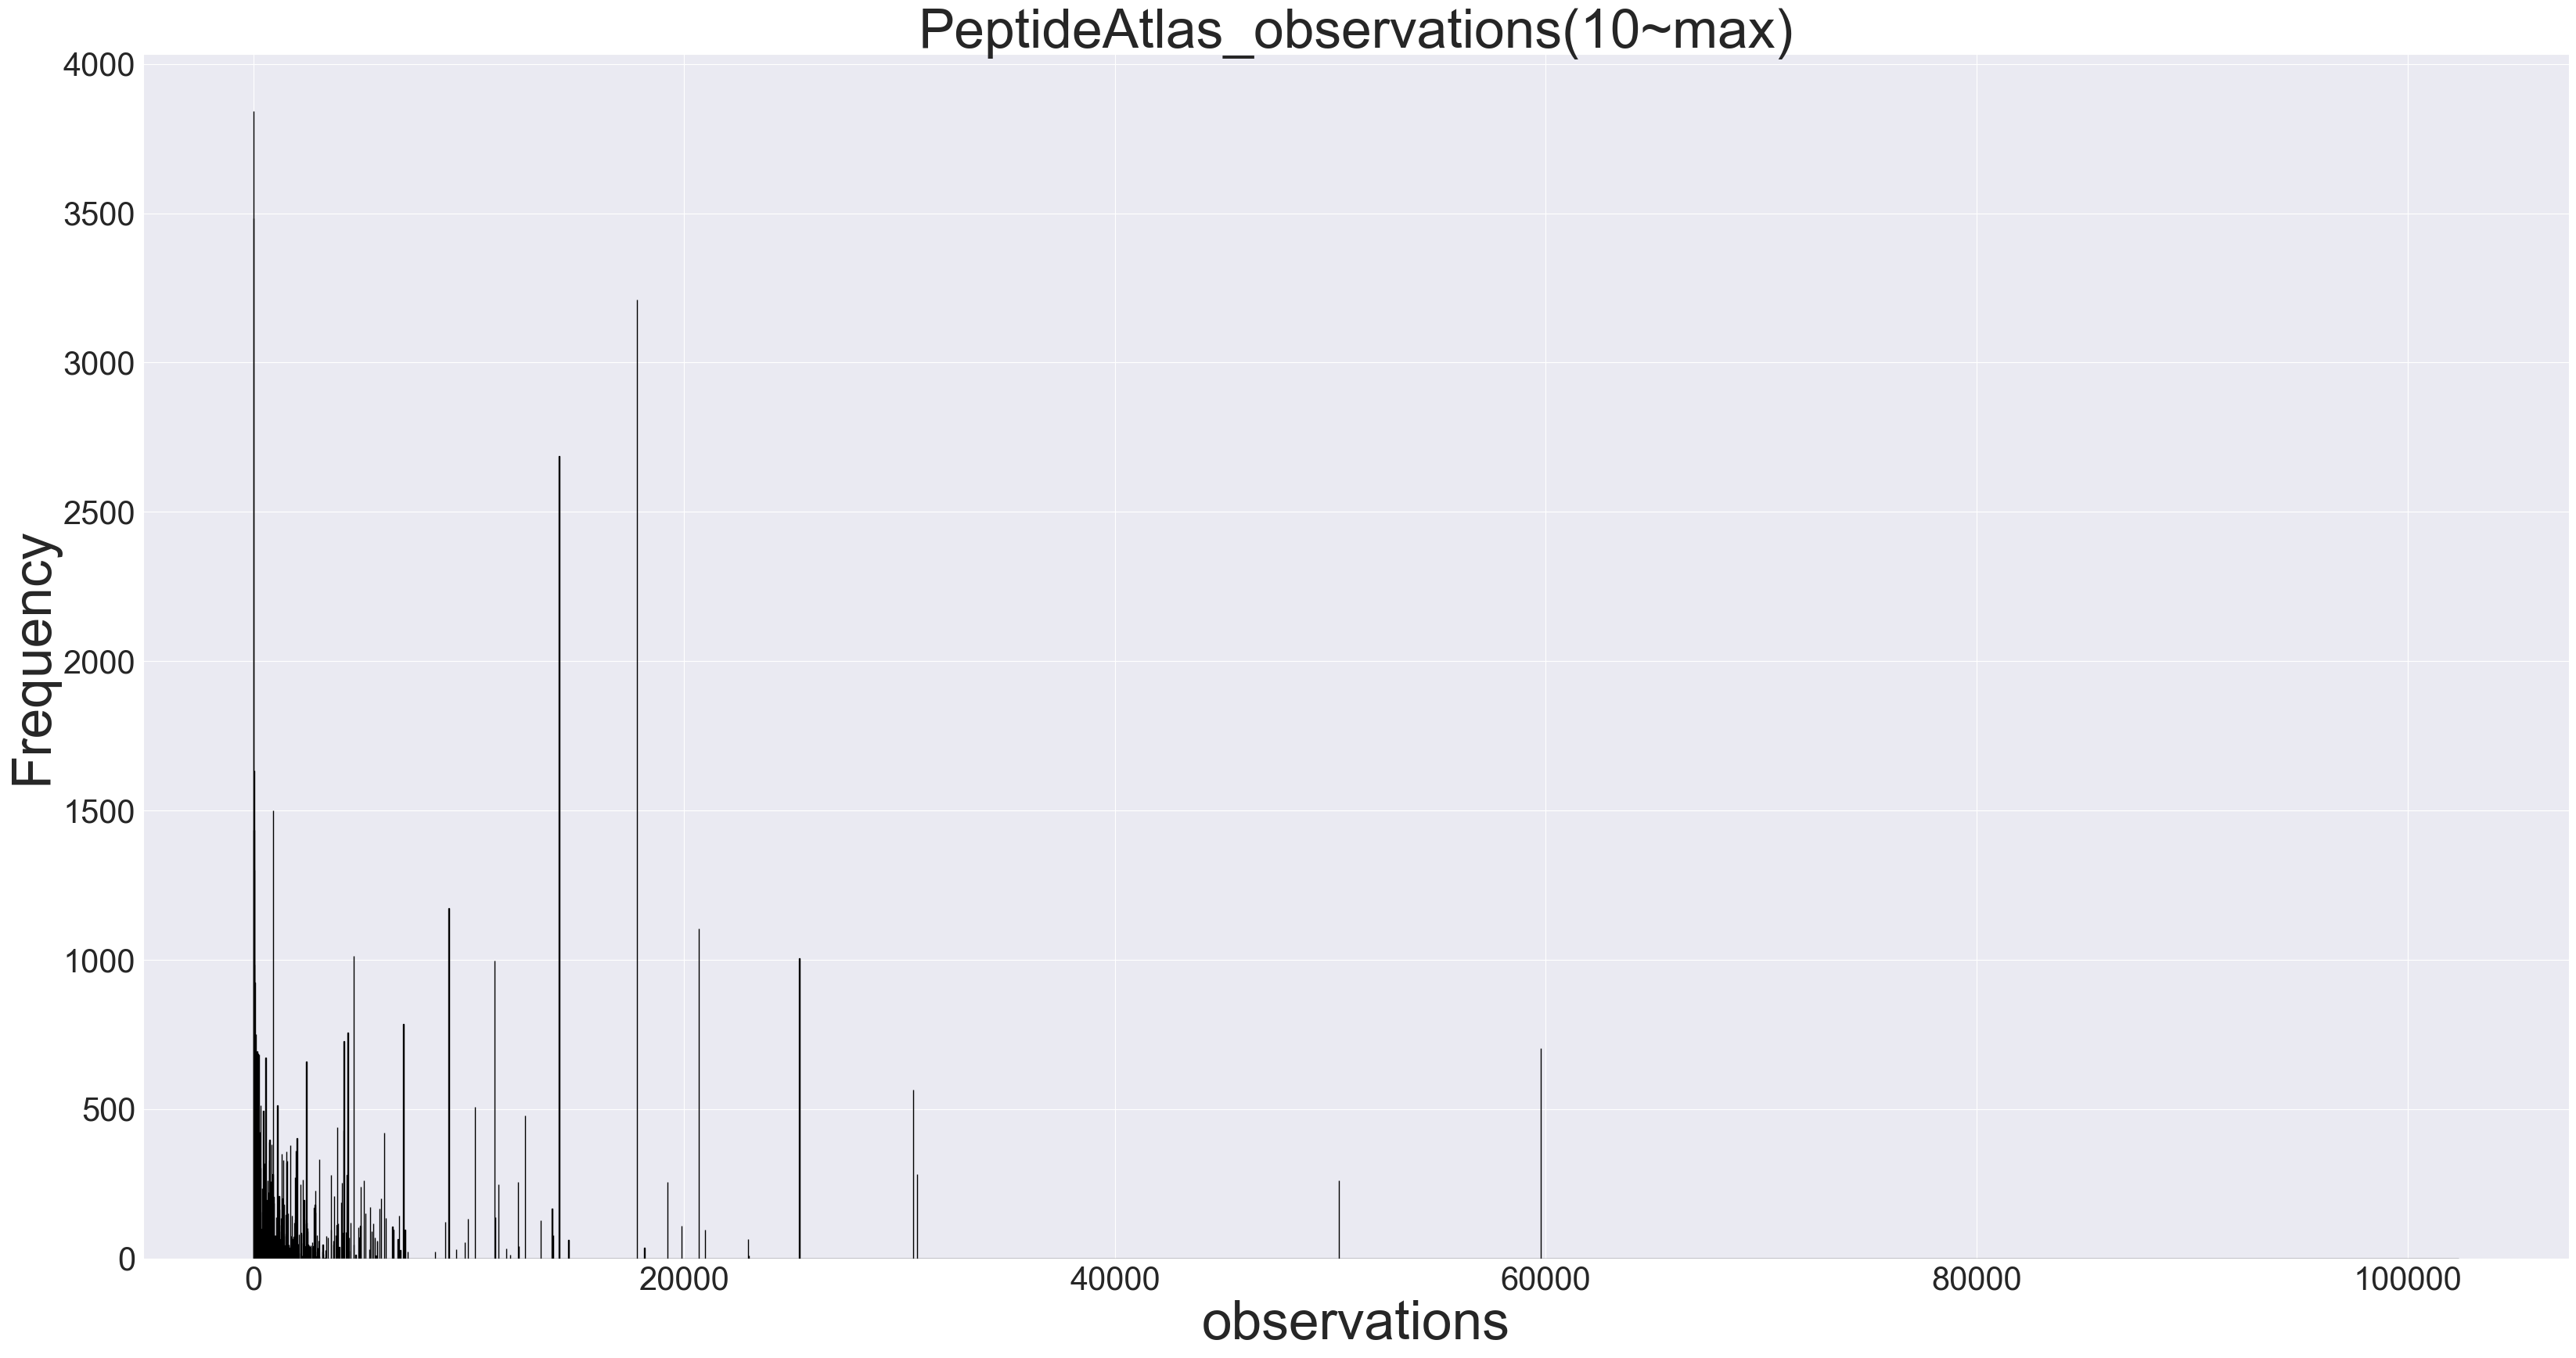

In [76]:
bins = range(10, 102375, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(10~max)', fontsize=50)
plt.show()

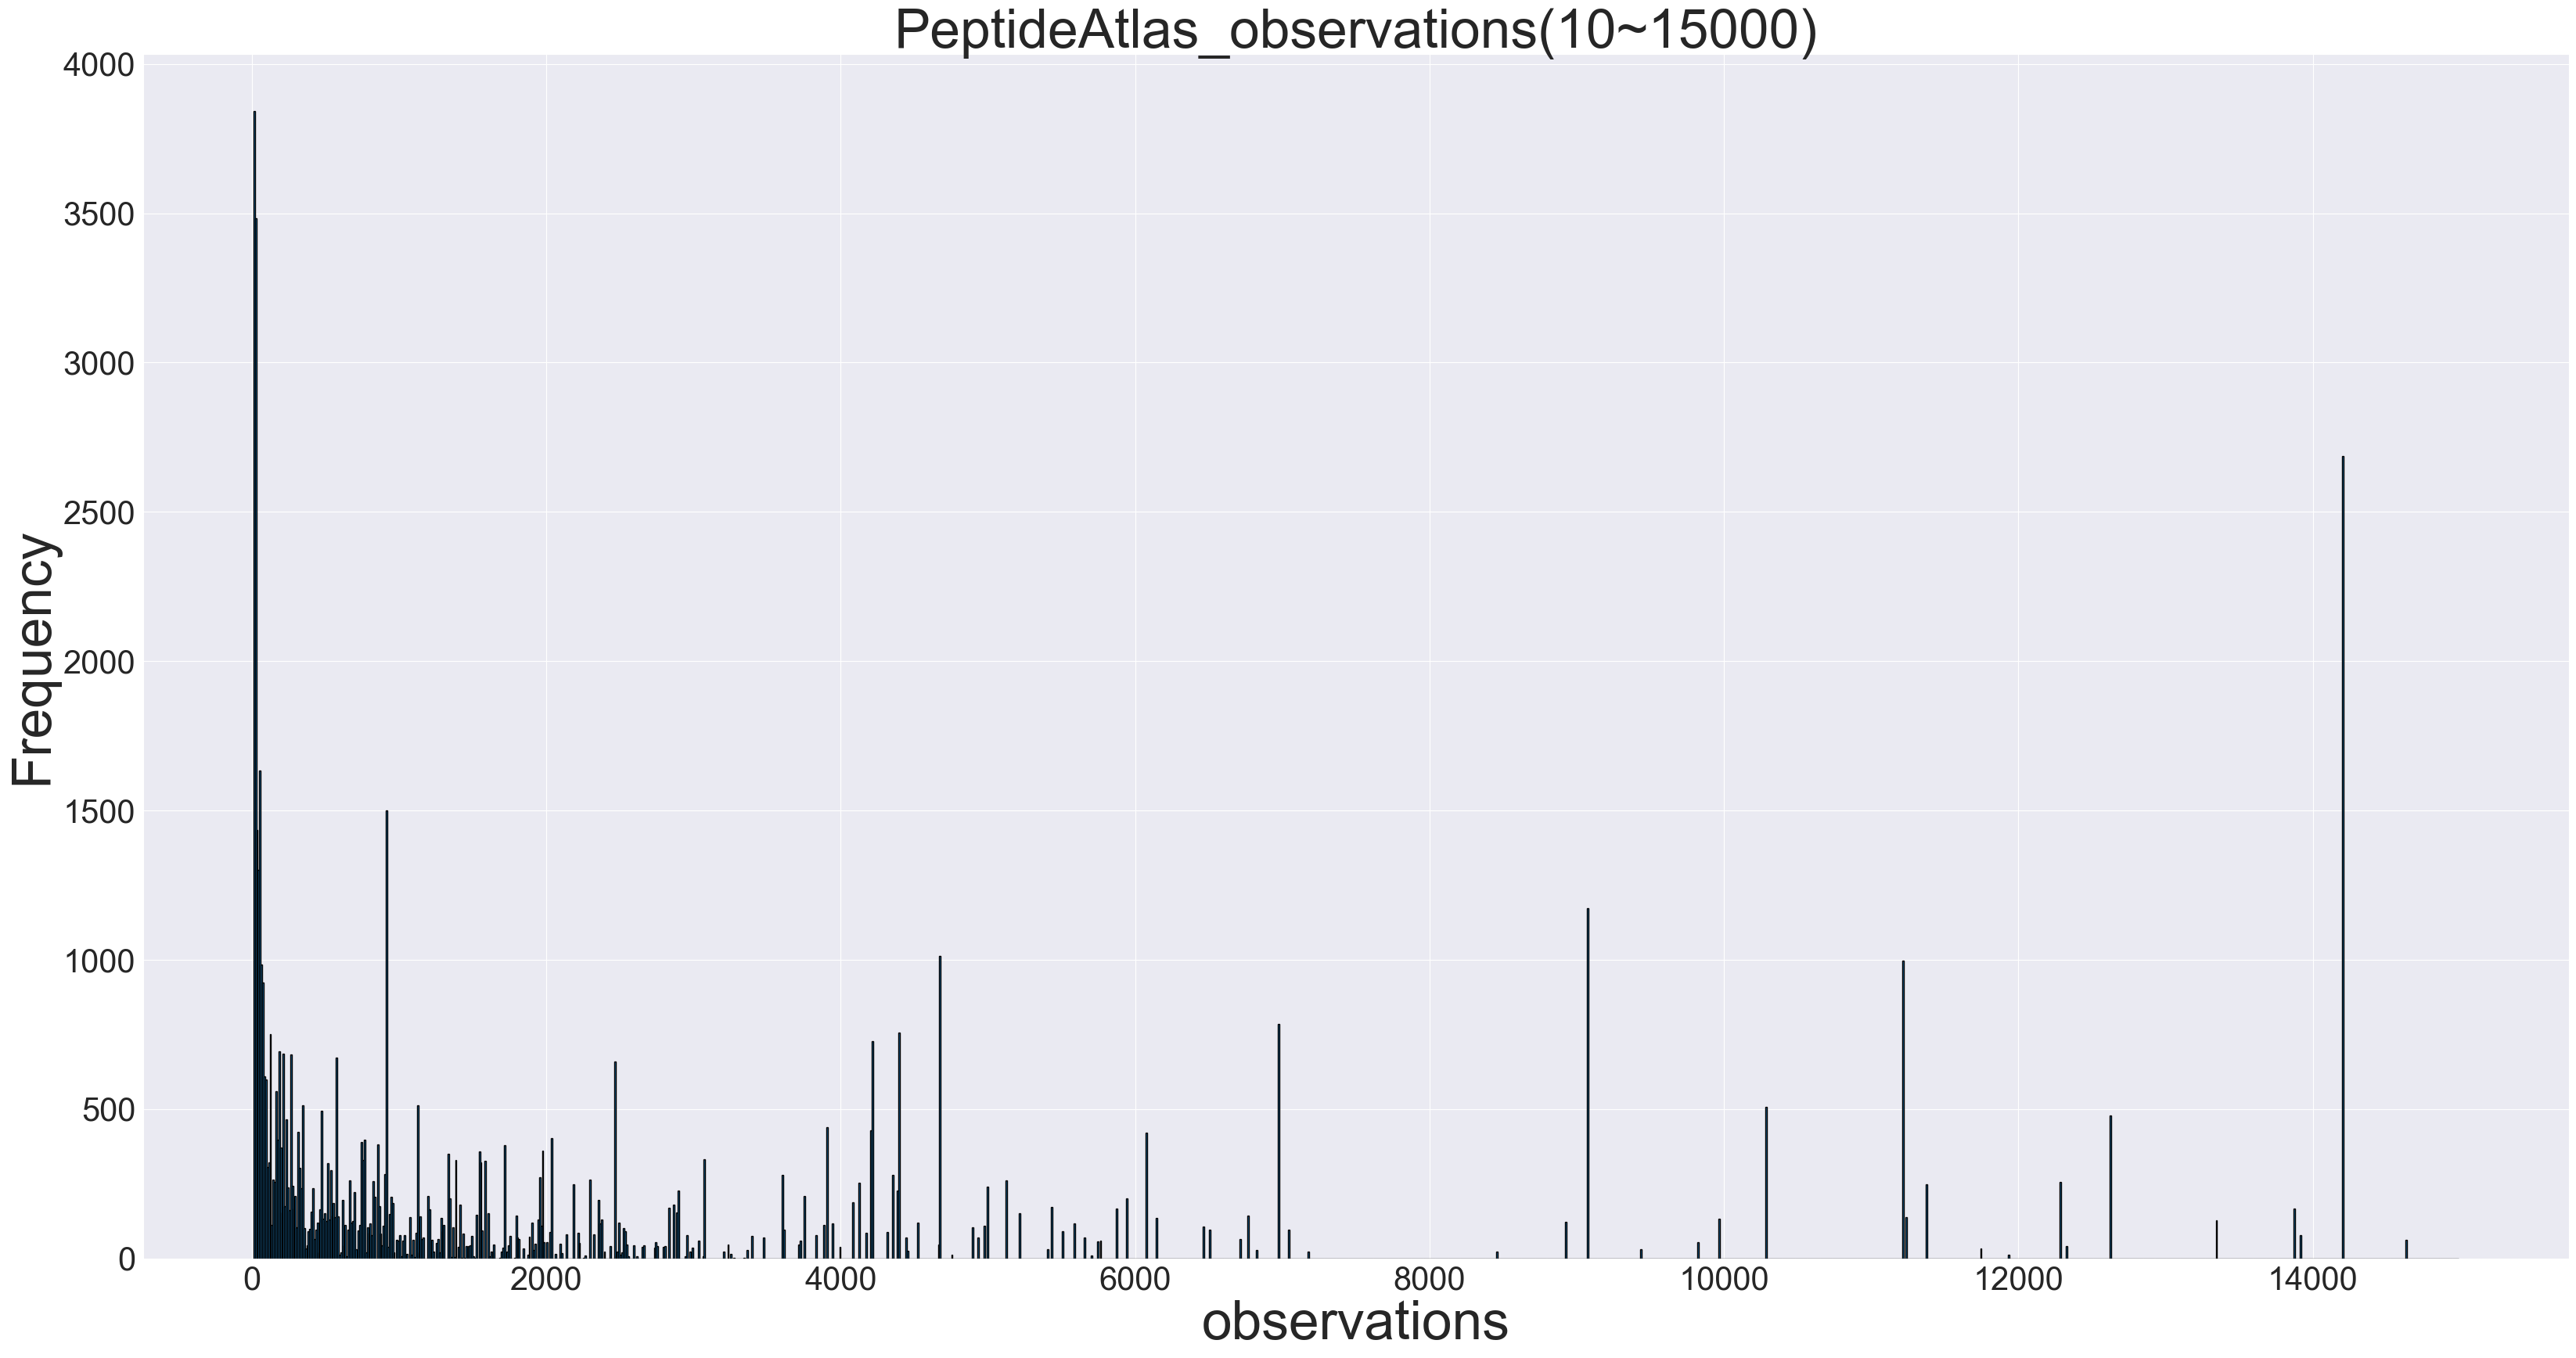

In [78]:
bins = range(10, 15000, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(10~15000)', fontsize=50)
plt.show()

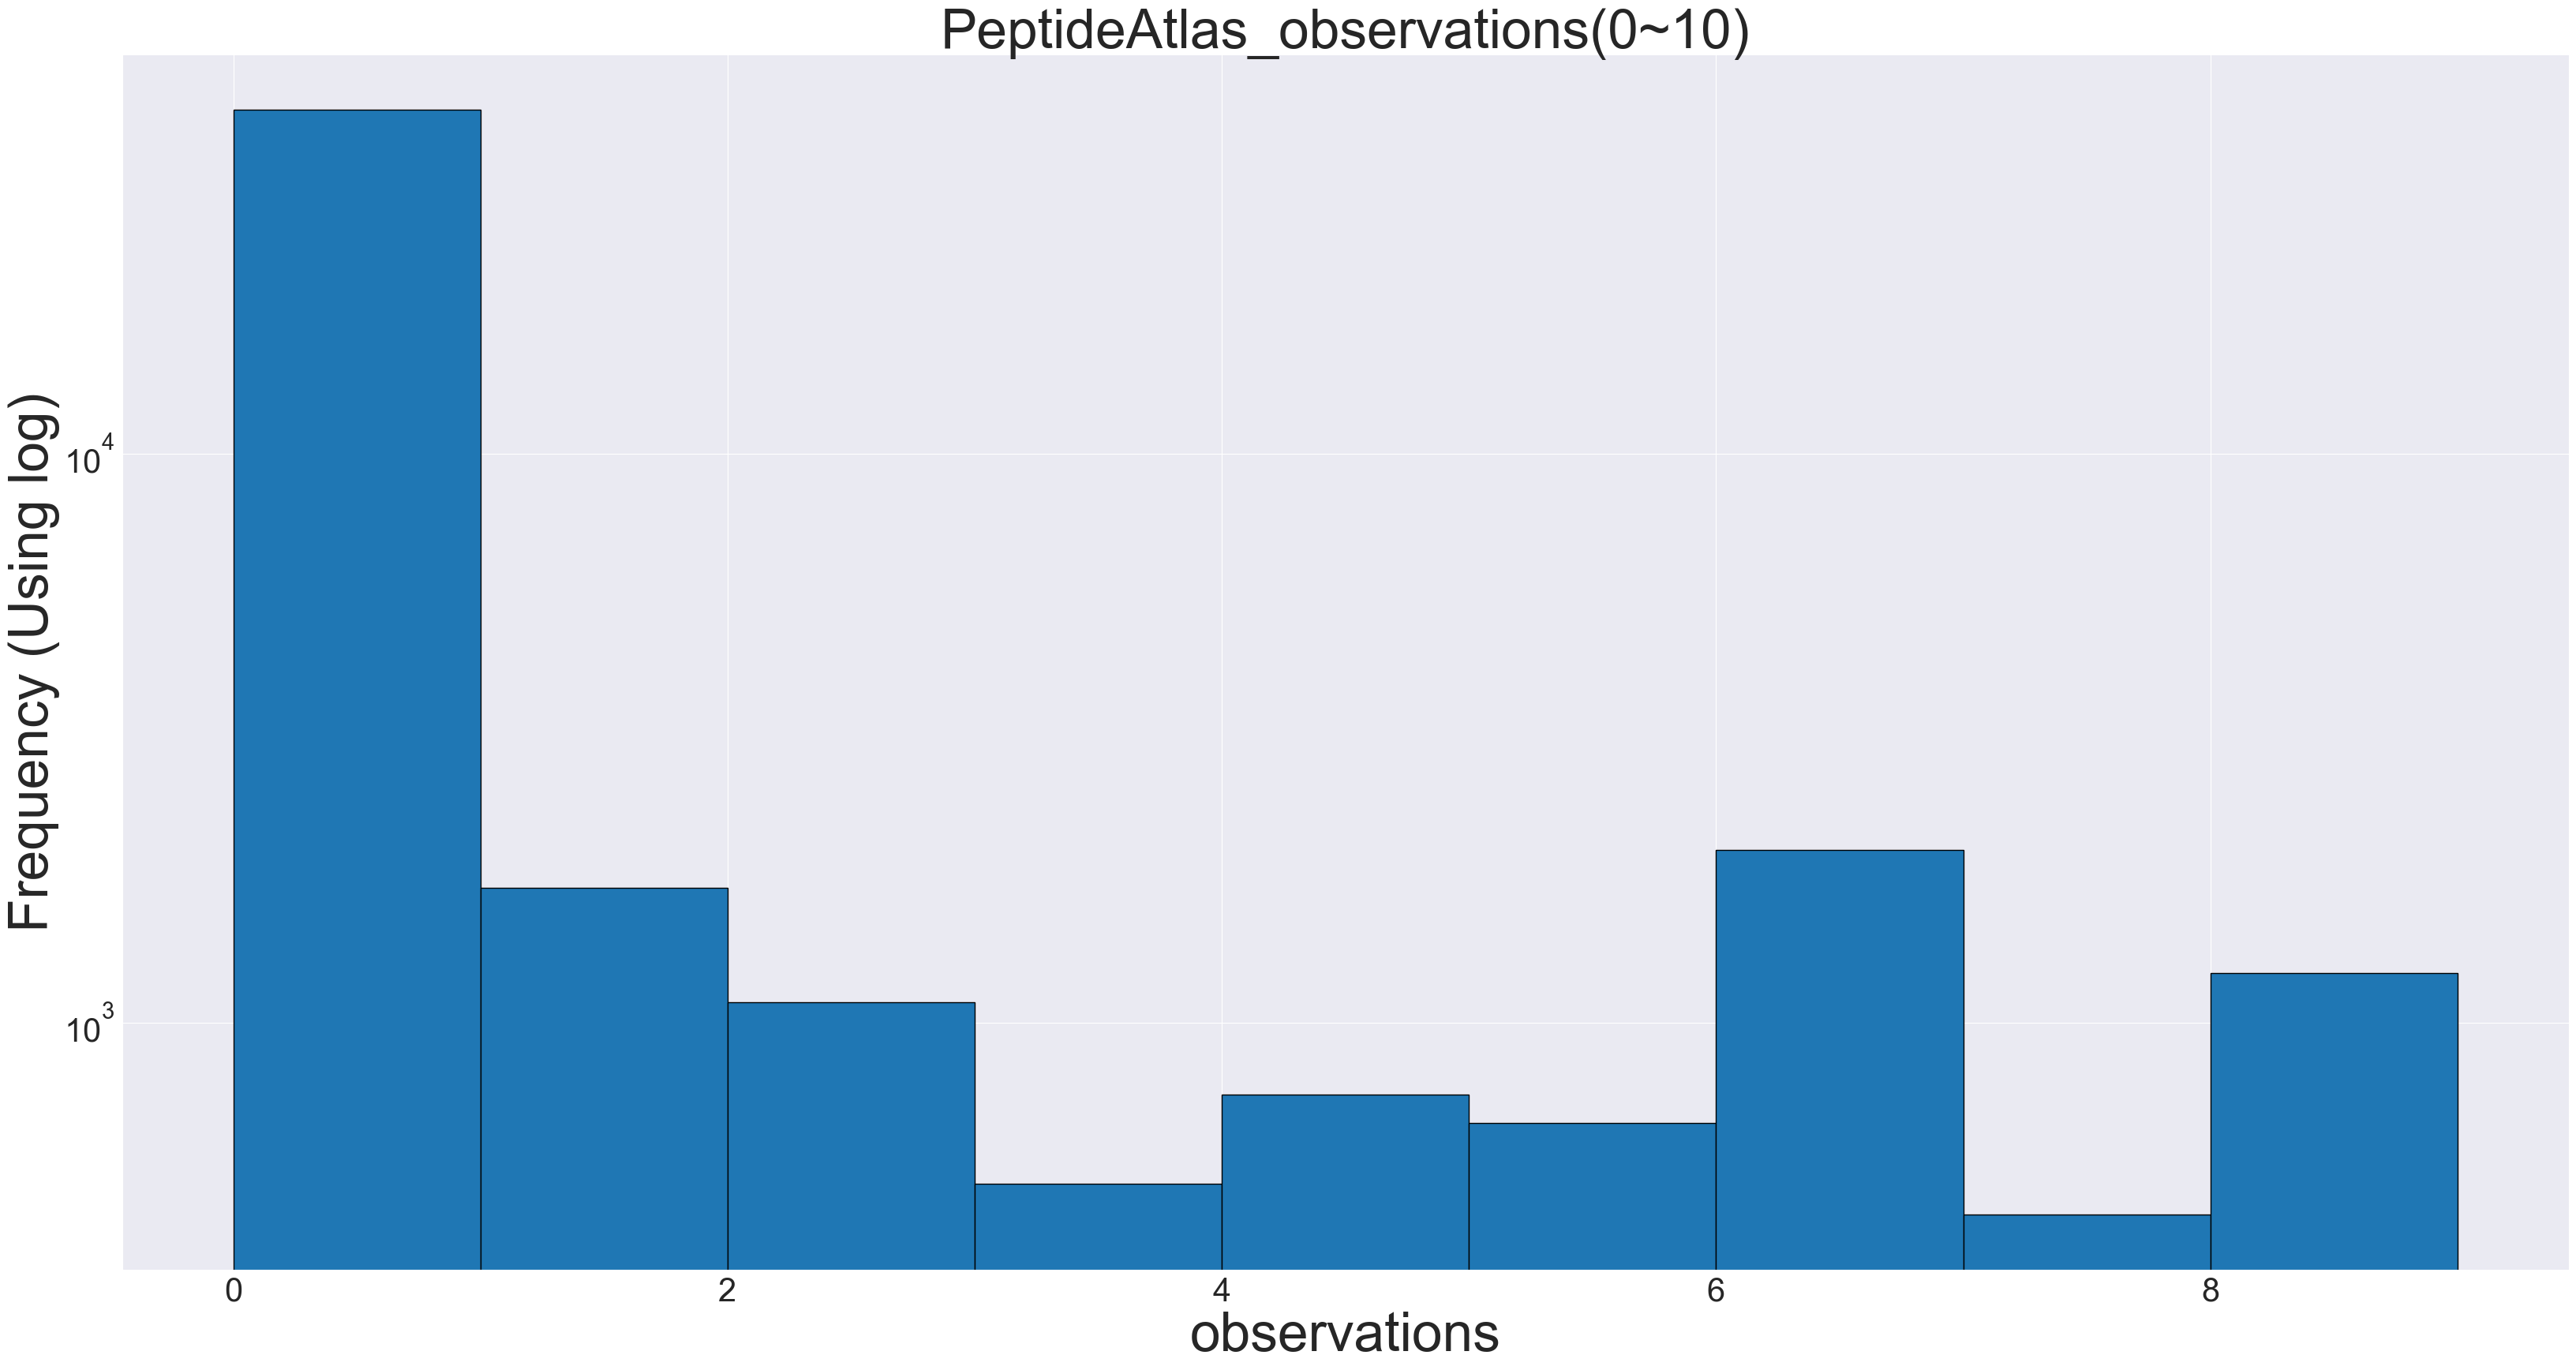

In [79]:
bins = range(0, 10, 1)
plt.figure(figsize=(40, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(0~10)', fontsize=50)
plt.show()

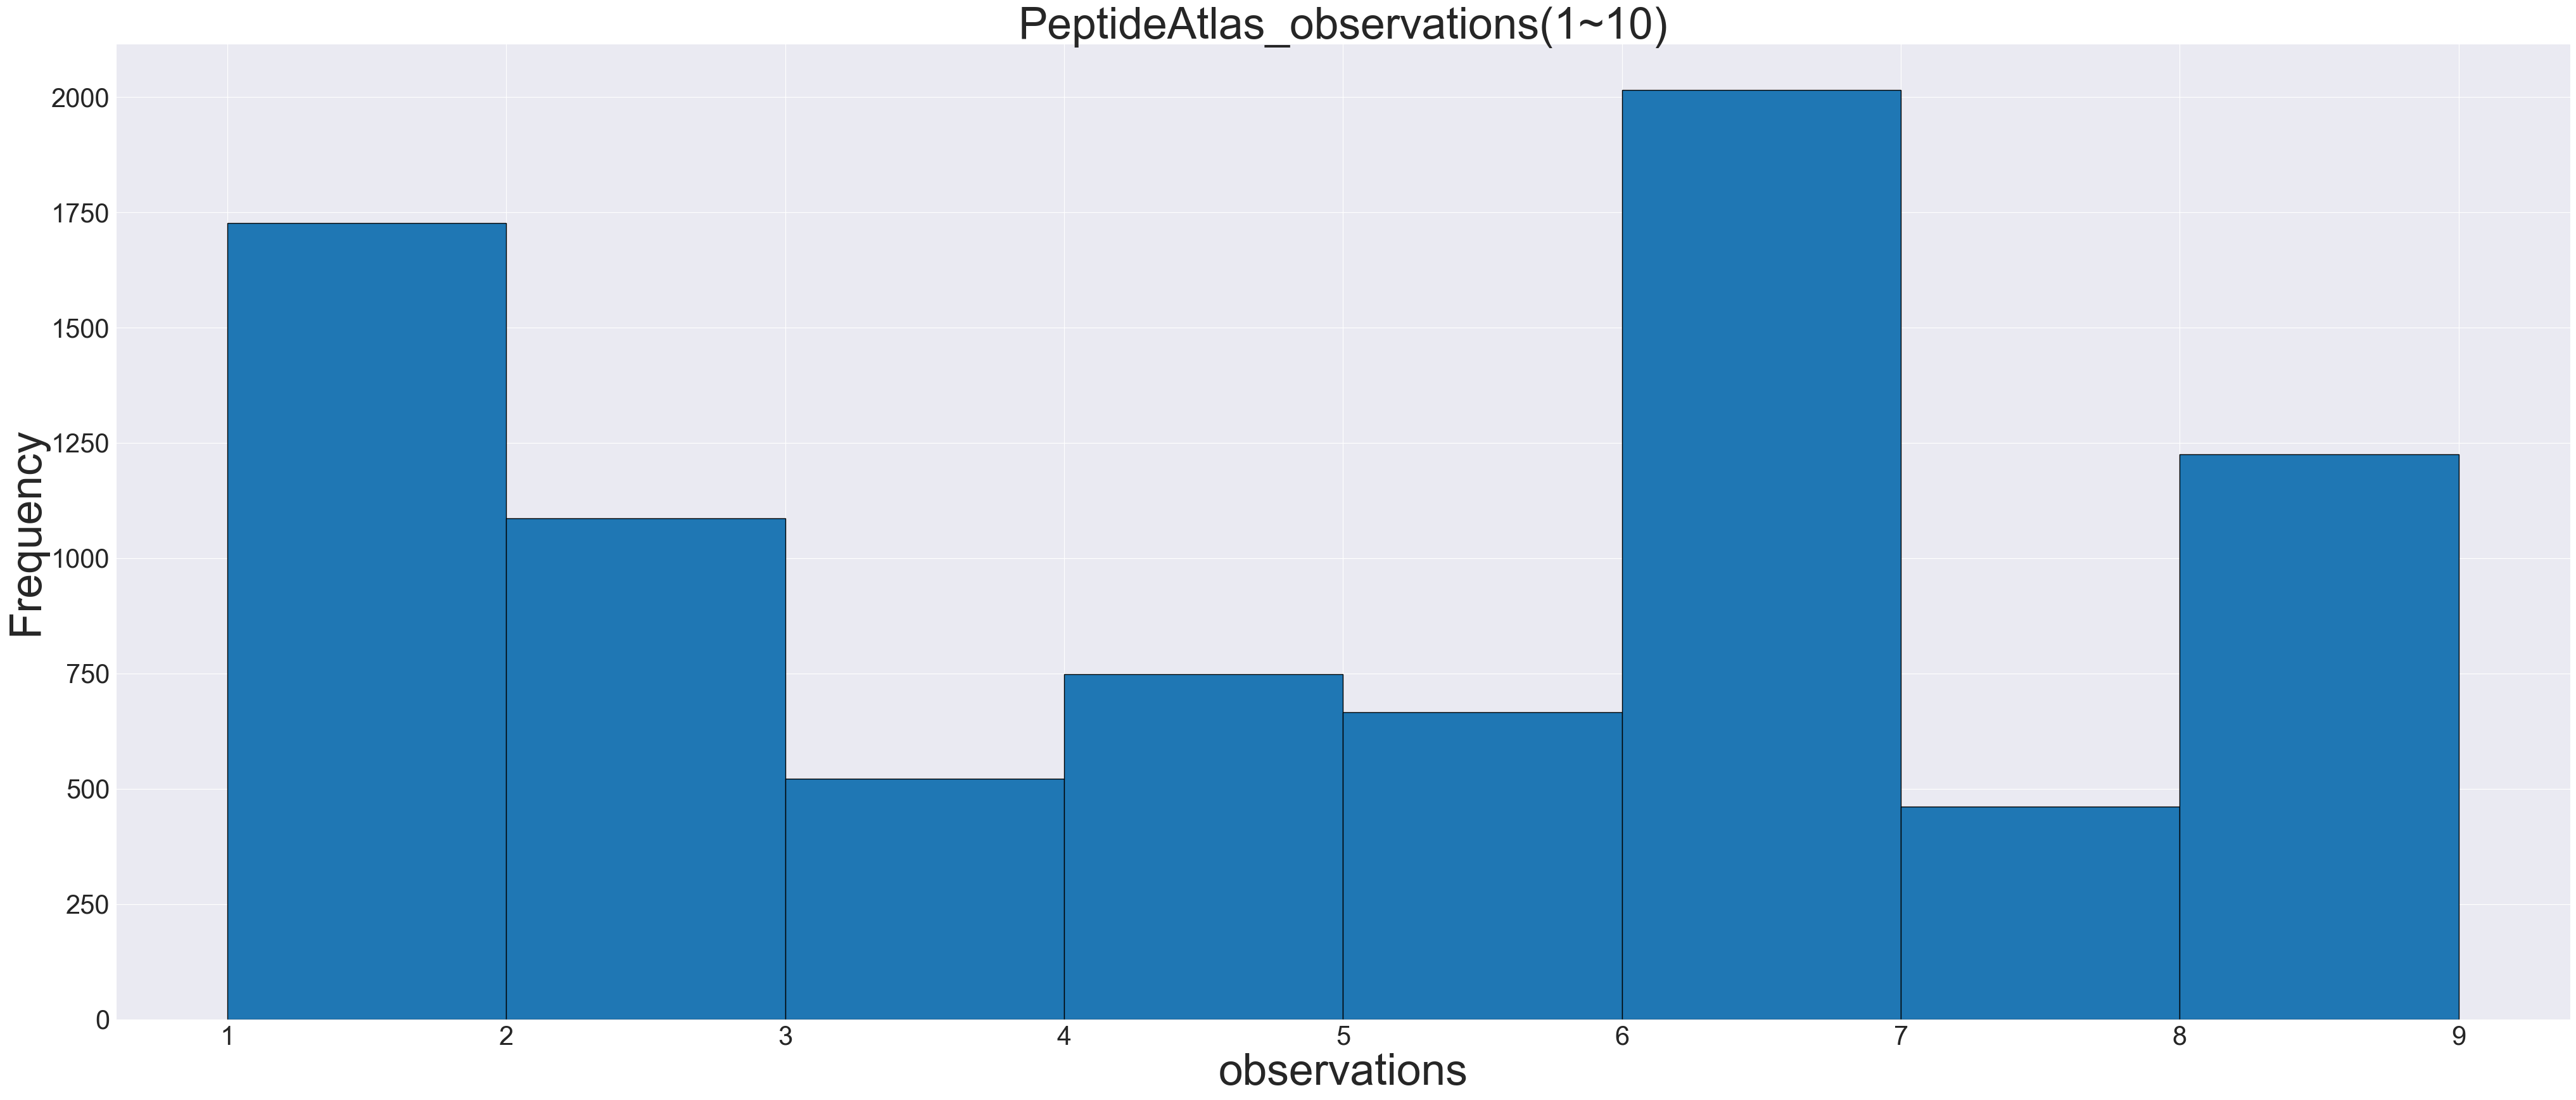

In [80]:
bins = range(1, 10, 1)
plt.figure(figsize=(50, 20))
plt.hist(GCA['PeptideAtlas_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('PeptideAtlas_observations(1~10)', fontsize=50)
plt.show()

#### GPMDB_observations

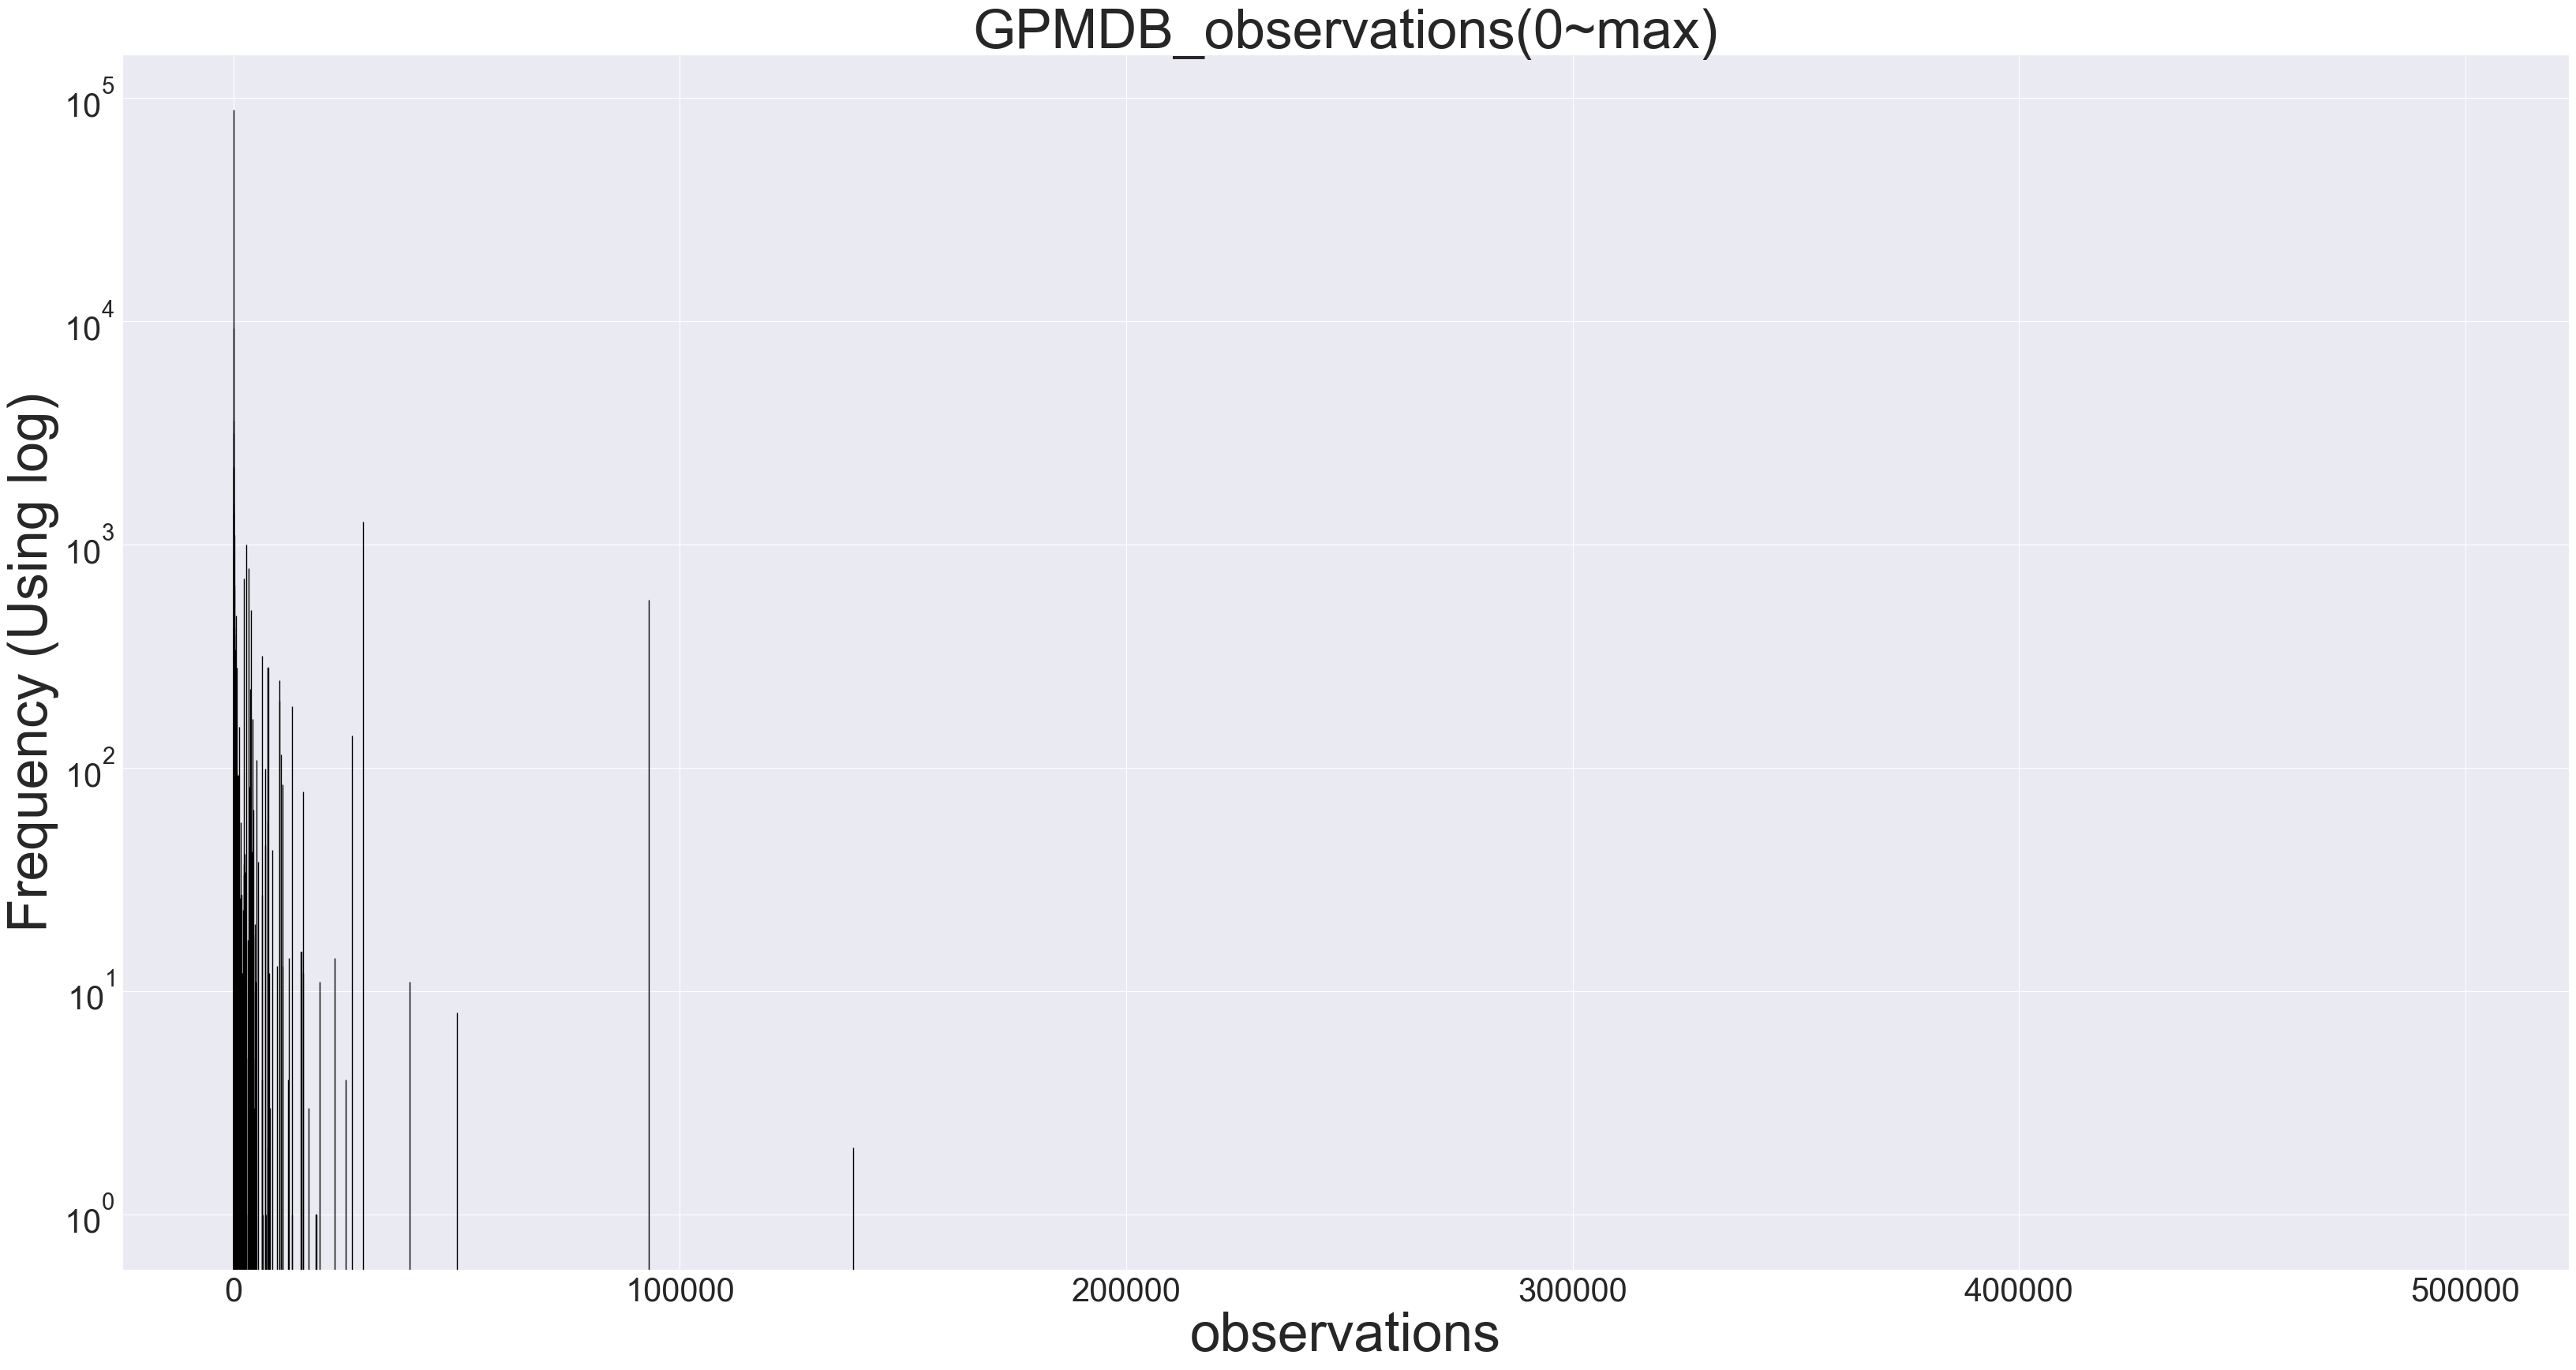

In [81]:
bins = range(0, 498277, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(0~max)', fontsize=50)
plt.show()

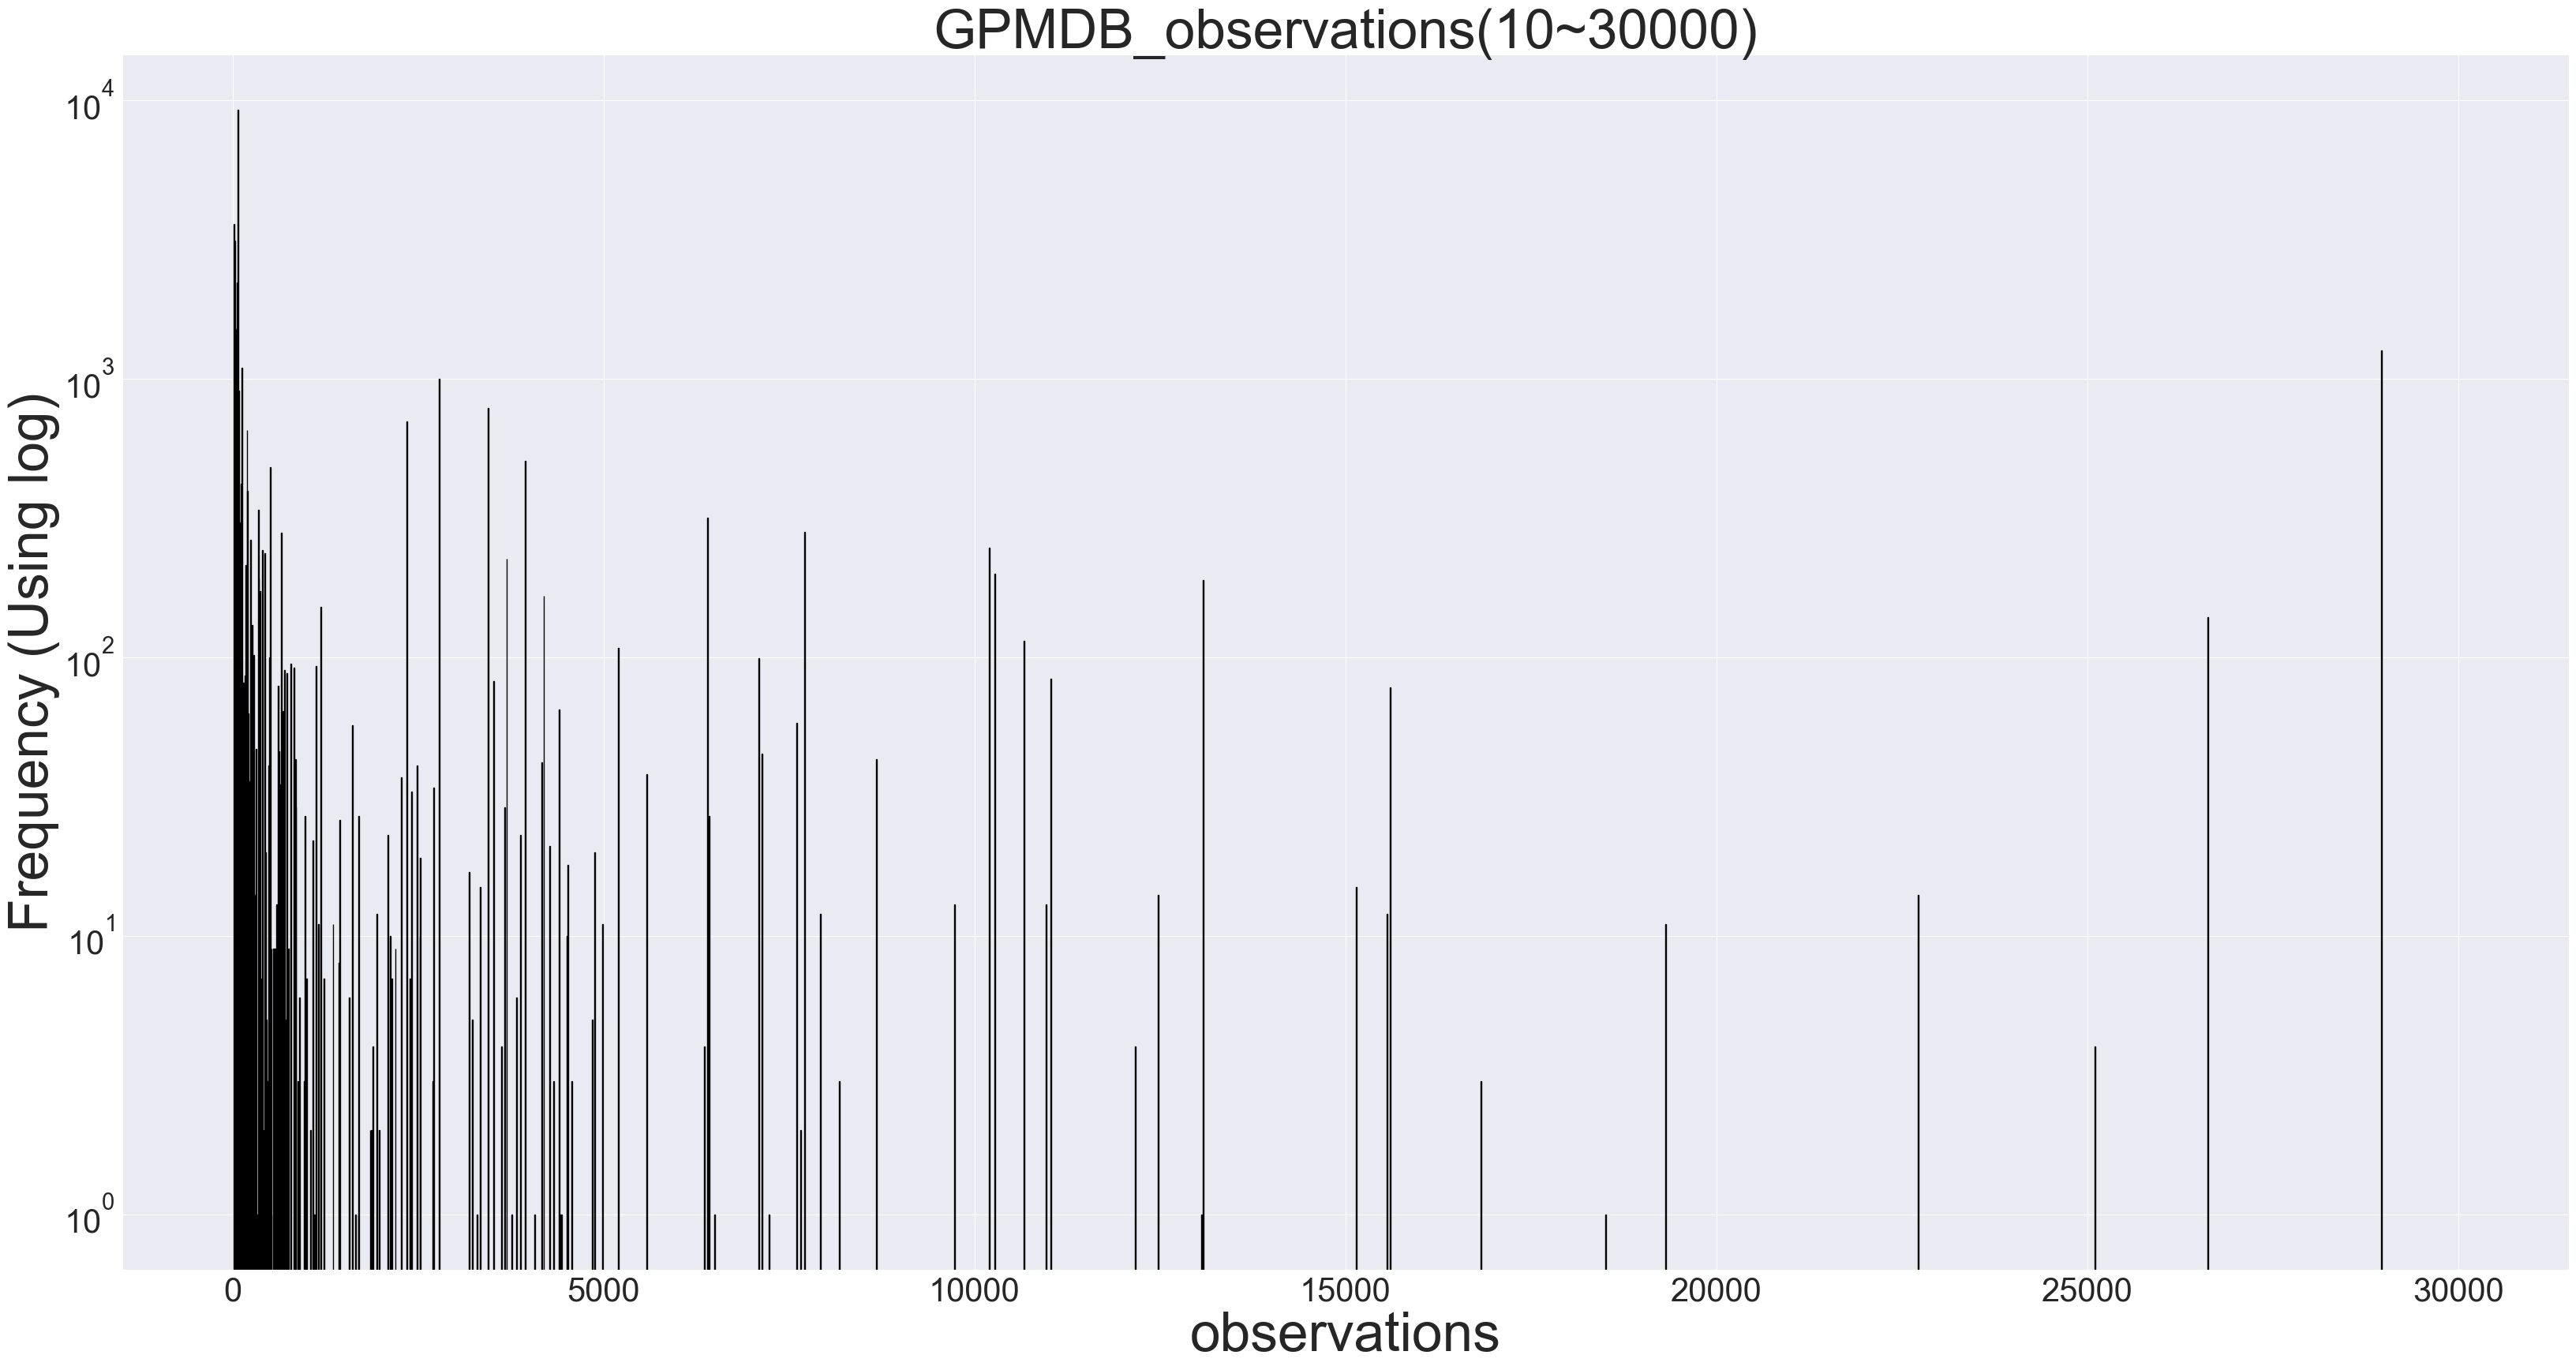

In [82]:
bins = range(10, 30000, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(10~30000)', fontsize=50)
plt.show()

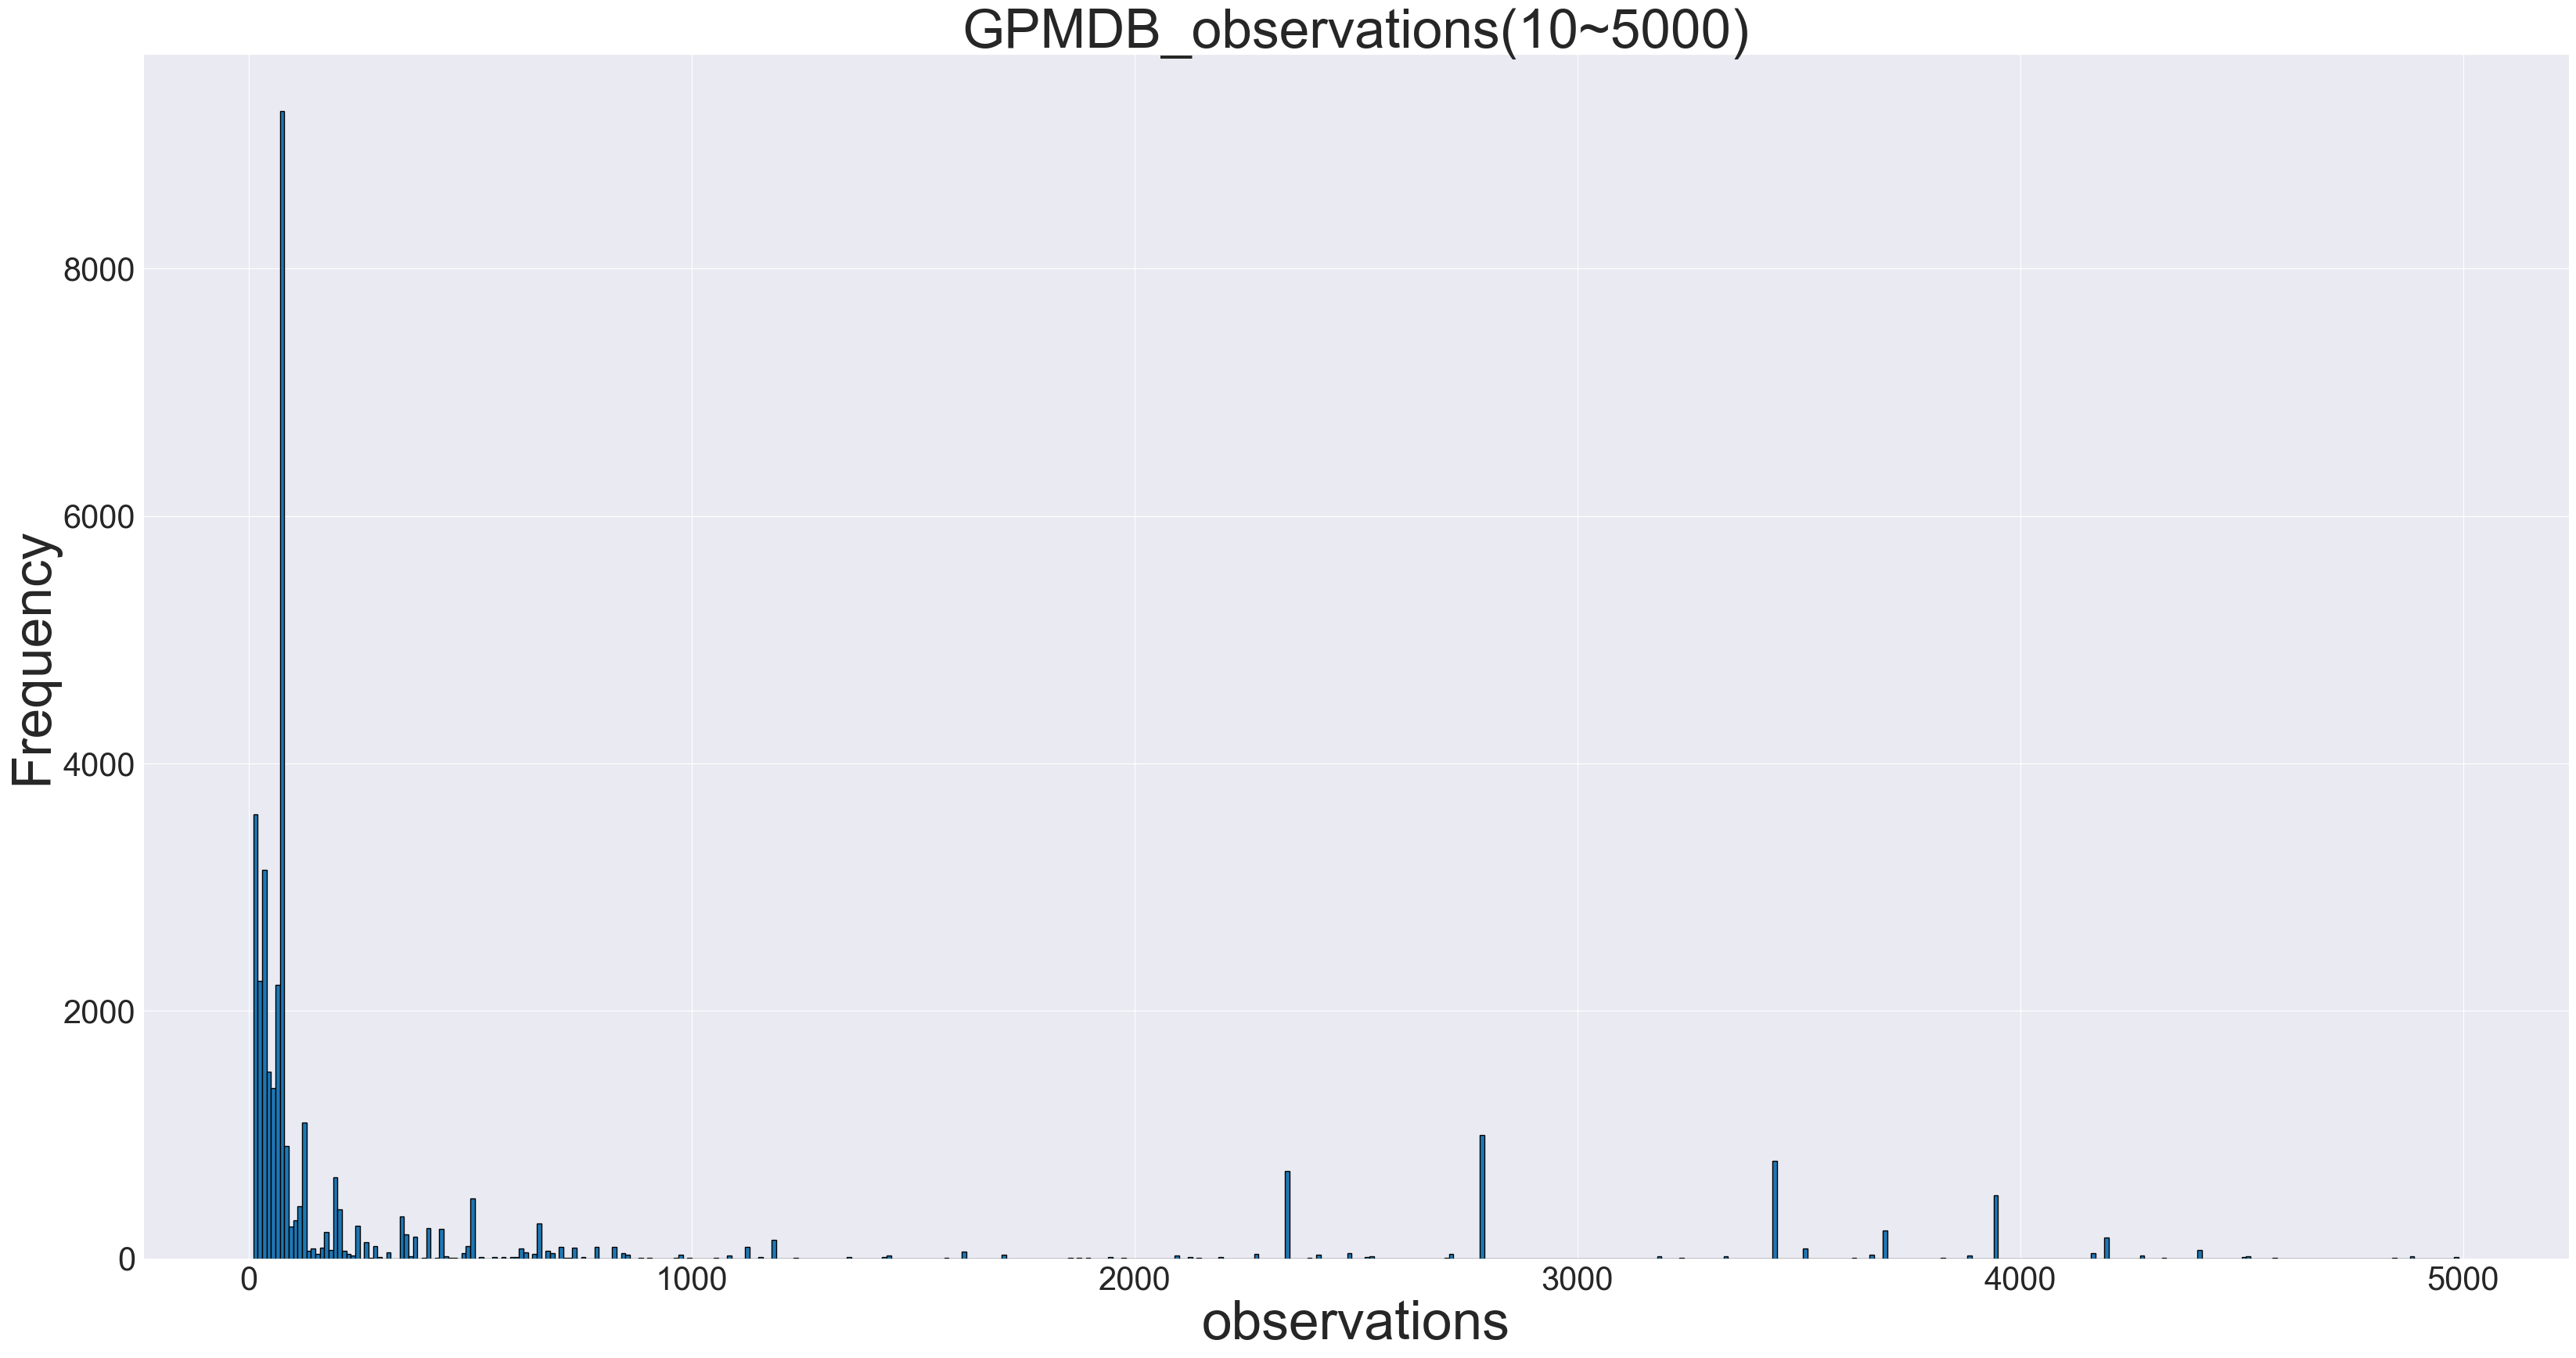

In [84]:
bins = range(10, 5000, 10)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(10~5000)', fontsize=50)
plt.show()

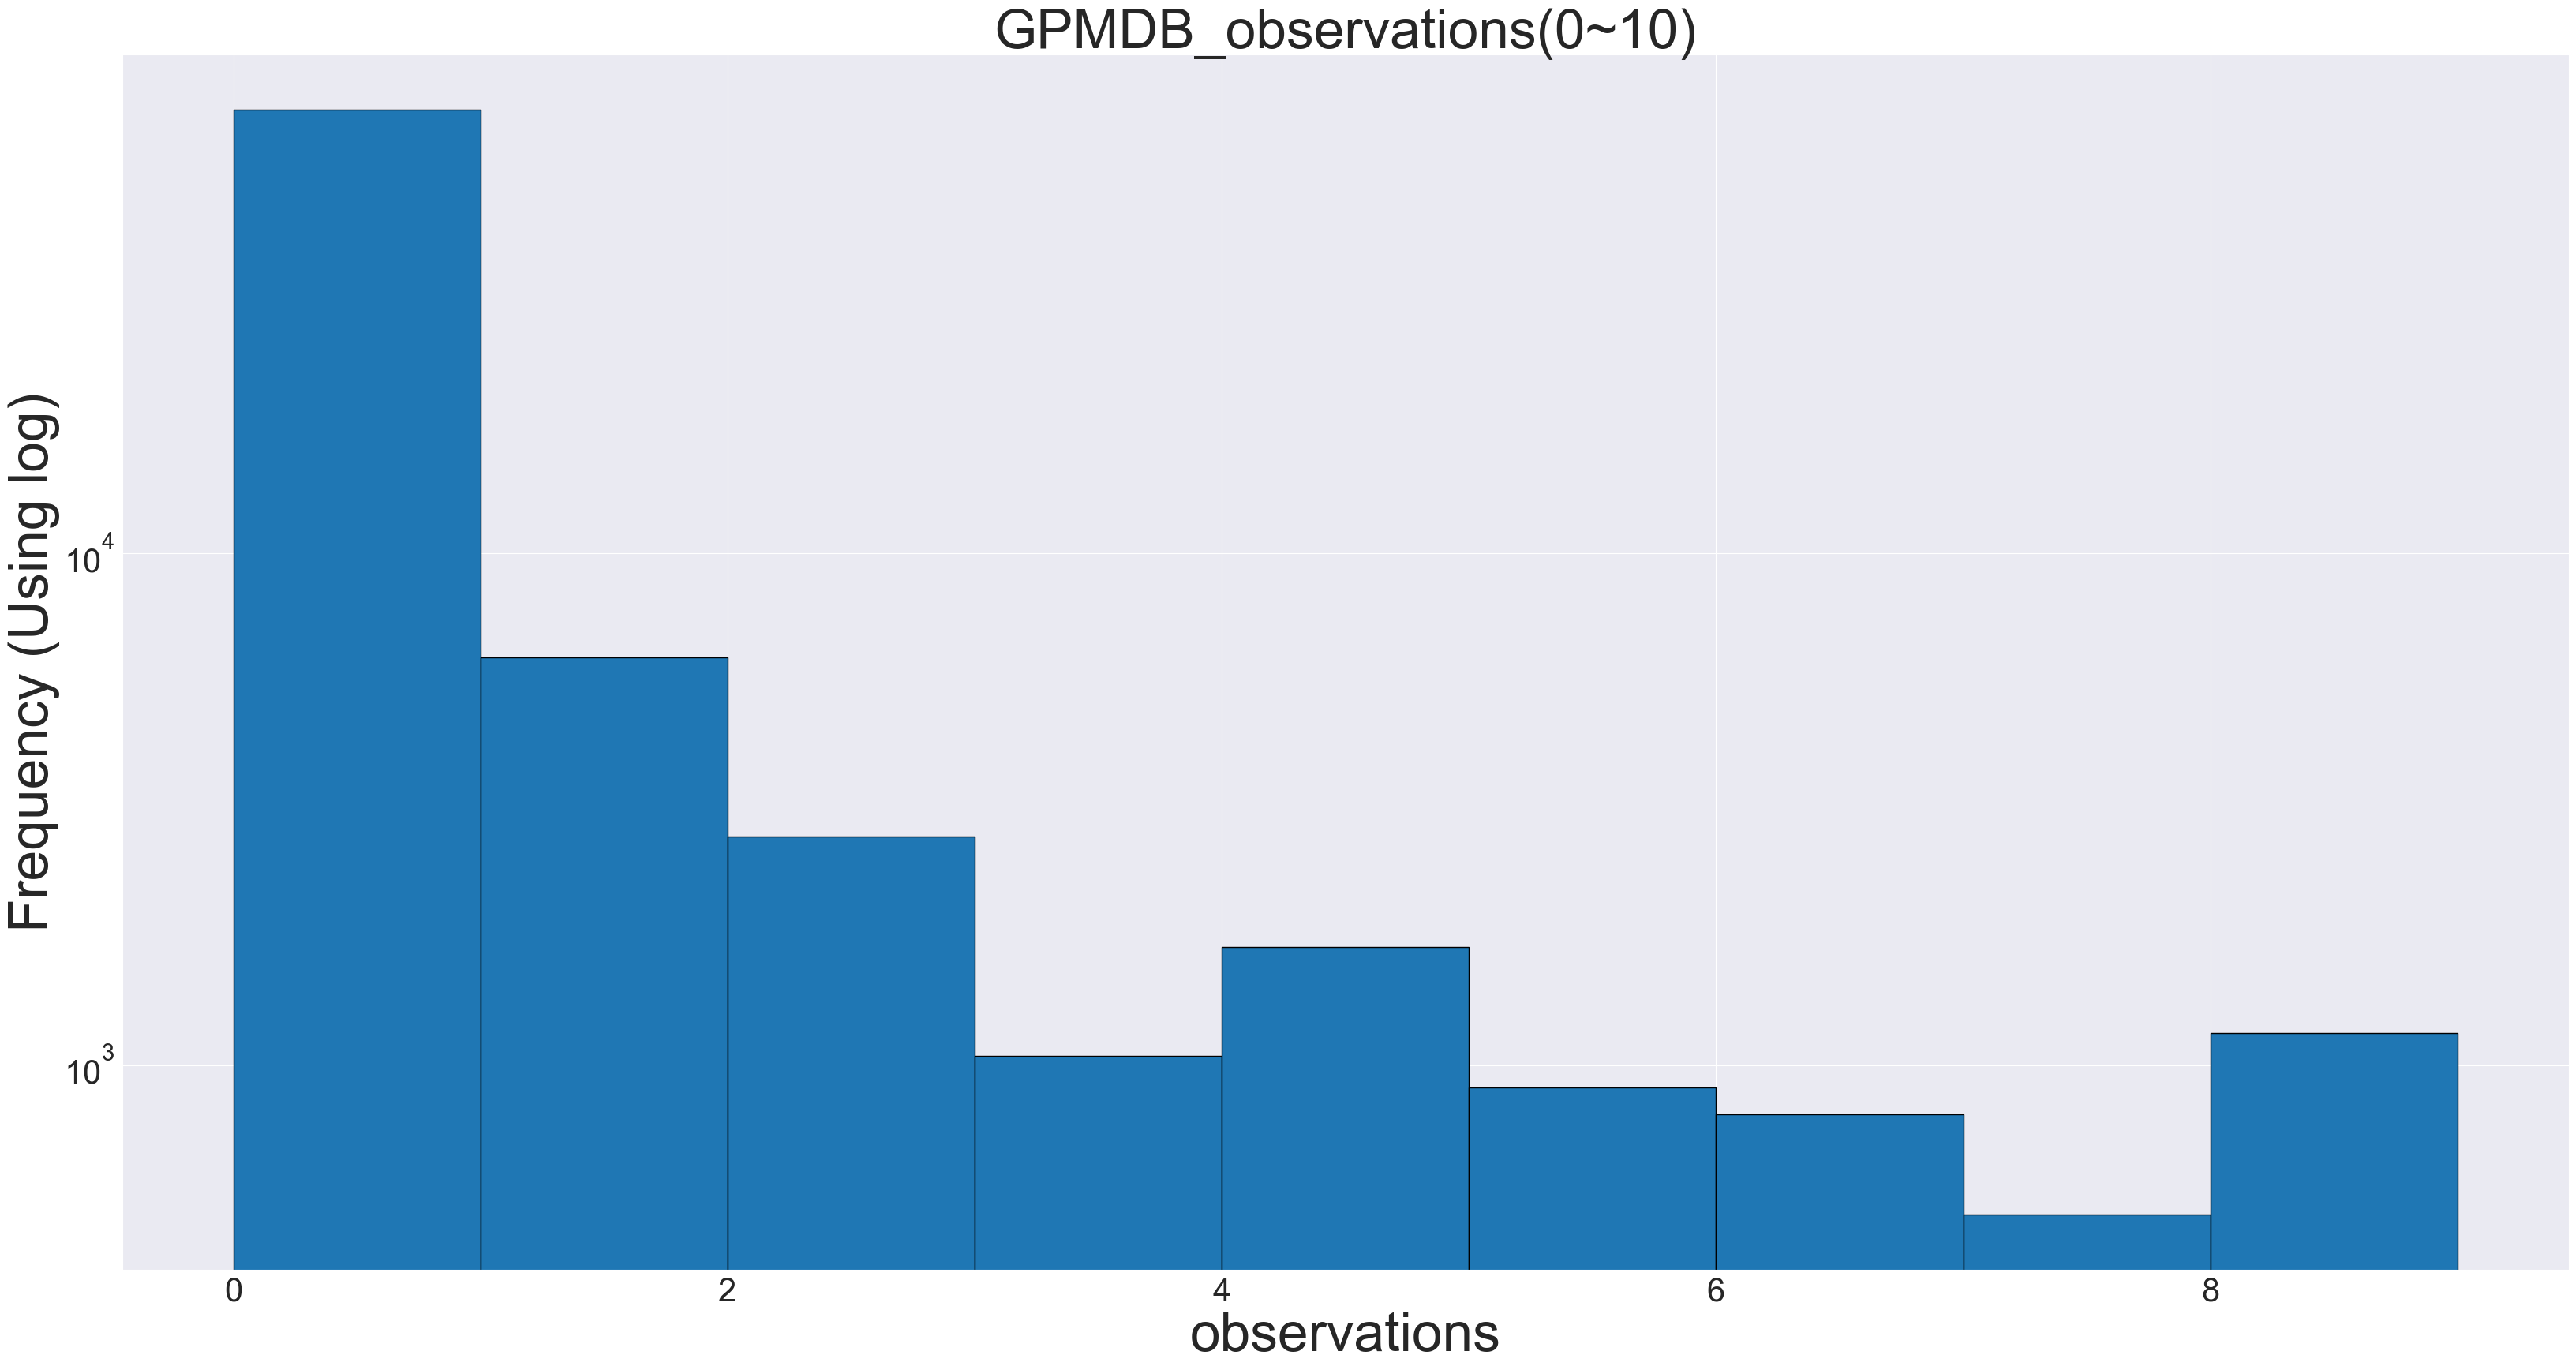

In [85]:
bins = range(0, 10, 1)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency (Using log)', fontsize=50)
plt.yscale('log')

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(0~10)', fontsize=50)
plt.show()

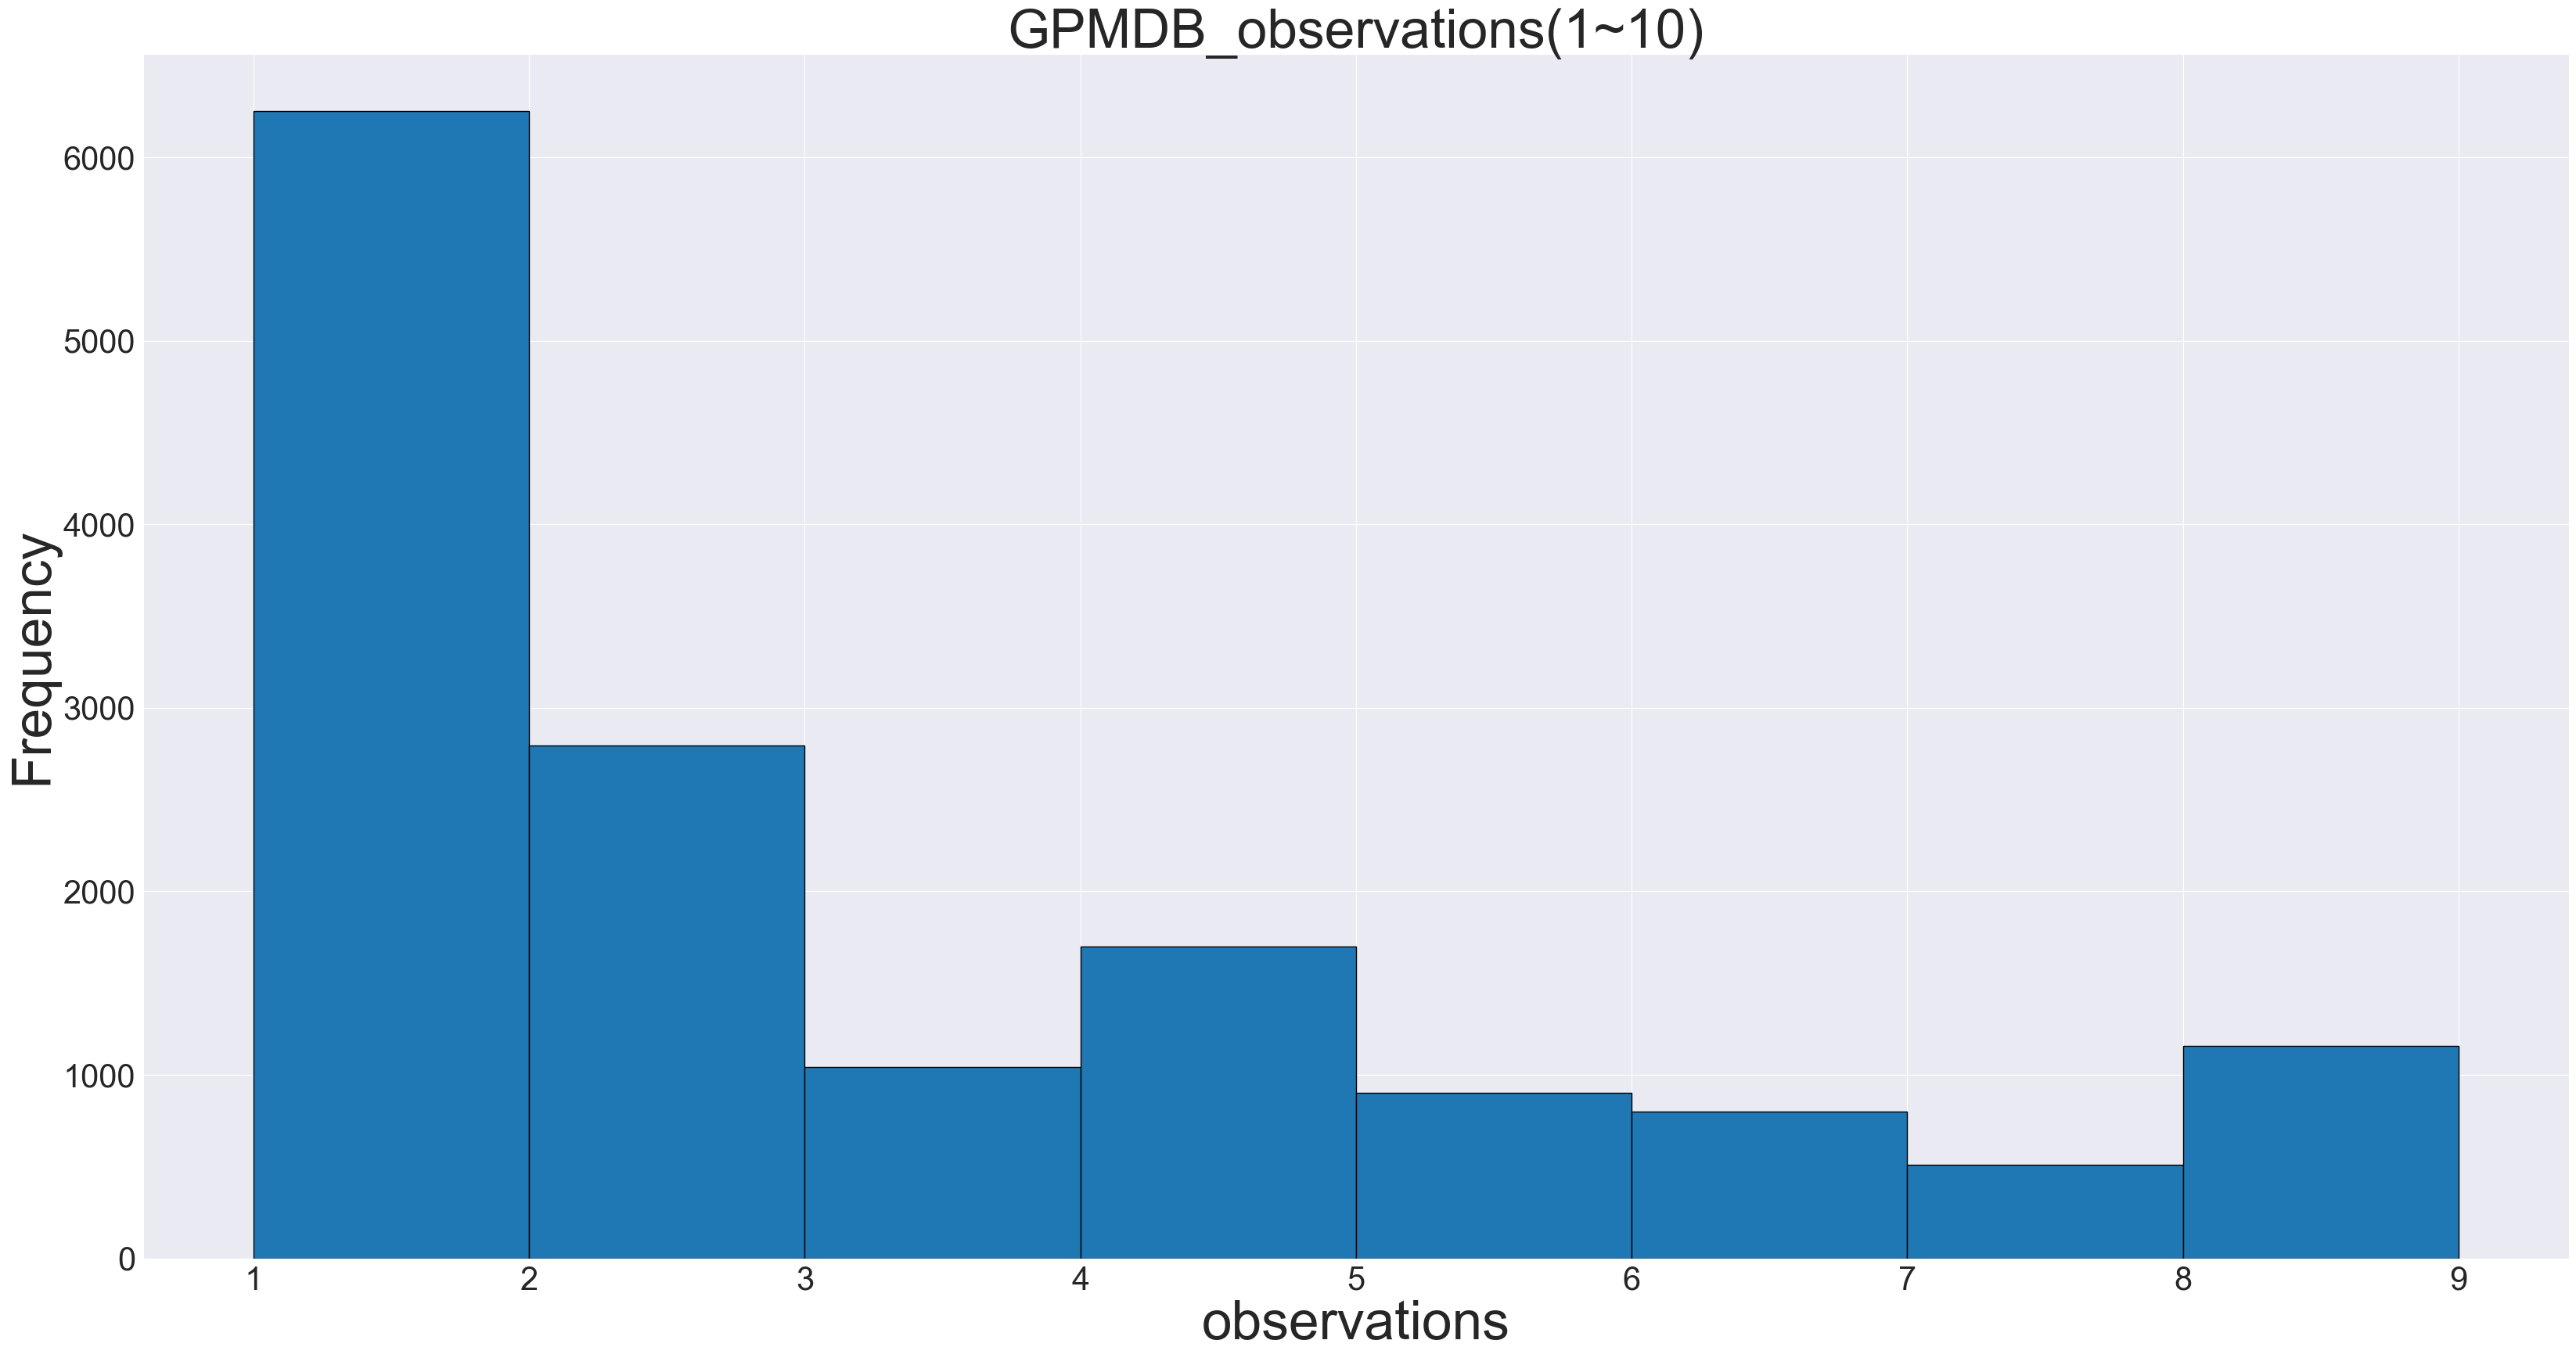

In [86]:
bins = range(1, 10, 1)
plt.figure(figsize=(40, 20))
plt.hist(GCA['GPMDB_observations'], bins=bins, edgecolor='black')

plt.xlabel('observations', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('GPMDB_observations(1~10)', fontsize=50)
plt.show()